## **Импорт нужных библиотек :**


In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import skew
import matplotlib.pyplot as plt
import statsmodels.stats.diagnostic as smd
import scipy.stats as SS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import statsmodels.api as sm
from sklearn.decomposition import PCA

from matplotlib.gridspec import GridSpec

from copy import  deepcopy

from statsmodels.compat import lzip


import statsmodels.tsa.api as smt

In [114]:
import warnings
warnings.filterwarnings("ignore")

## Импорт данных


In [115]:
!git clone 'https://github.com/NotFound143/Econometric' -q

data = pd.read_csv('Econometric/SNP500_data.csv' , sep= ';')

fatal: destination path 'Econometric' already exists and is not an empty directory.


In [116]:
data.head(10)

,Date,SNP500,M2,DJONES,NASDAQ,GS1,USGD,UNEMPL,CPI,FFER
0,2015-04-01,2085.51,11852.8,17840.52,4941.42,0.23,19064.8,5.4,2.063124,0.124667
1,2015-05-01,2107.39,11873.4,18010.68,5070.03,0.24,18957.8,5.6,2.066887,0.123226
2,2015-06-01,2063.11,11947.4,17619.51,4986.87,0.28,18779.0,5.3,2.114733,0.129000
3,2015-07-01,2103.84,11949.6,17689.86,5128.28,0.30,18895.3,5.2,2.141448,0.130323
4,2015-08-01,1972.18,12076.4,16528.03,4776.51,0.38,18816.9,5.1,2.180240,0.138065
5,2015-09-01,1920.03,12074.0,16284.70,4620.16,0.37,18932.0,5.0,2.279431,0.136000
6,2015-10-01,2079.36,12132.9,17663.54,5053.75,0.26,18860.3,5.0,2.346211,0.123548
7,2015-11-01,2080.41,12304.6,17719.92,5108.67,0.48,19456.9,5.1,2.405261,0.117667
8,2015-12-01,2043.94,12453.0,17425.03,5007.41,0.65,19477.8,5.0,2.443687,0.240645
9,2016-01-01,1940.24,12412.0,16466.30,4613.95,0.54,19877.6,4.8,2.466722,0.342903


# Удалим пропущенные значения

In [117]:
data = data.dropna()
data.set_index('Date', inplace=True) # Сделаем столбец с датами индексом в датафрейме

In [118]:
data

,SNP500,M2,DJONES,NASDAQ,GS1,USGD,UNEMPL,CPI,FFER
Date,,,,,,,,,
2015-04-01,2085.51,11852.8,17840.52,4941.42,0.23,19064.8,5.4,2.063124,0.124667
2015-05-01,2107.39,11873.4,18010.68,5070.03,0.24,18957.8,5.6,2.066887,0.123226
2015-06-01,2063.11,11947.4,17619.51,4986.87,0.28,18779.0,5.3,2.114733,0.129000
2015-07-01,2103.84,11949.6,17689.86,5128.28,0.30,18895.3,5.2,2.141448,0.130323
2015-08-01,1972.18,12076.4,16528.03,4776.51,0.38,18816.9,5.1,2.180240,0.138065
...,...,...,...,...,...,...,...,...,...
2023-03-01,4109.31,20896.8,33274.15,12221.91,4.68,29613.8,3.5,6.451708,4.649032
2023-04-01,4169.48,20700.6,34098.16,12226.58,4.68,29639.7,3.4,6.322749,4.830000
2023-05-01,4179.83,20781.6,32908.27,12935.29,4.91,29302.2,3.7,6.000606,5.055806


Общая описательная статистика.

In [119]:
statistic = data.describe().transpose() # С помощью transpose транспонируем нашу таблицу с описательной статистикой, чтобы она имела вид как в gretl.
statistic


,count,mean,std,min,25%,50%,75%,max
SNP500,100.0,3098.495200,839.843666,1920.030000,2404.900000,2913.205000,3892.735000,4766.180000
M2,100.0,16339.622000,3511.576560,11852.800000,13464.750000,14612.150000,20401.125000,21845.200000
DJONES,100.0,26140.698200,6031.124719,16284.700000,20991.615000,25922.340000,32675.762500,36338.300000
NASDAQ,100.0,8956.827370,3361.231180,4557.950000,6117.217500,8002.791000,11882.497500,15644.970000
GS1,100.0,1.514100,1.440658,0.050000,0.300000,1.160000,2.332500,5.370000
USGD,100.0,24464.526000,4262.281947,18779.000000,20644.475000,22733.400000,29221.575000,30781.600000
UNEMPL,100.0,4.783000,1.861359,3.400000,3.700000,4.250000,5.000000,14.700000
CPI,100.0,3.017063,1.389751,1.517012,2.245716,2.485108,2.751825,6.617223
FFER,100.0,1.251488,1.354419,0.049000,0.123468,0.775806,1.924796,5.120000


In [120]:
missing_values = pd.DataFrame(data.isna().sum() , columns = ['Пропущенные значения'] )
missing_values
 # Соответствует столбцу в gretl "Пропущенные наблюдения" .

,Пропущенные значения
SNP500,0
M2,0
DJONES,0
NASDAQ,0
GS1,0
USGD,0
UNEMPL,0
CPI,0
FFER,0


In [121]:
# Дополинтельно посчитаем медиану , вариацию , ассиметрию ,
#эксцесс , 5 и 95 % перцентиль , межквартильный размах , которых нет в таблице выше


In [122]:
d = {'Медиана': data.median(), 'Вариация': data.std() / data.mean() , 'Ассмиметрия' : skew(data) }
df = pd.DataFrame(data=d)
df

,Медиана,Вариация,Ассмиметрия
SNP500,2913.205000,0.271049,0.381640
M2,14612.150000,0.214912,0.387551
DJONES,25922.340000,0.230718,0.017737
NASDAQ,8002.791000,0.375270,0.432863
GS1,1.160000,0.951495,1.108571
USGD,22733.400000,0.174223,0.210568
UNEMPL,4.250000,0.389161,3.183271
CPI,2.485108,0.460631,1.626874
FFER,0.775806,1.082246,1.327283


In [123]:
res2 = pd.concat([statistic , missing_values  , df ], axis=1, join='inner')
res2

,count,mean,std,min,25%,50%,75%,max,Пропущенные значения,Медиана,Вариация,Ассмиметрия
SNP500,100.0,3098.495200,839.843666,1920.030000,2404.900000,2913.205000,3892.735000,4766.180000,0,2913.205000,0.271049,0.381640
M2,100.0,16339.622000,3511.576560,11852.800000,13464.750000,14612.150000,20401.125000,21845.200000,0,14612.150000,0.214912,0.387551
DJONES,100.0,26140.698200,6031.124719,16284.700000,20991.615000,25922.340000,32675.762500,36338.300000,0,25922.340000,0.230718,0.017737
NASDAQ,100.0,8956.827370,3361.231180,4557.950000,6117.217500,8002.791000,11882.497500,15644.970000,0,8002.791000,0.375270,0.432863
GS1,100.0,1.514100,1.440658,0.050000,0.300000,1.160000,2.332500,5.370000,0,1.160000,0.951495,1.108571
USGD,100.0,24464.526000,4262.281947,18779.000000,20644.475000,22733.400000,29221.575000,30781.600000,0,22733.400000,0.174223,0.210568
UNEMPL,100.0,4.783000,1.861359,3.400000,3.700000,4.250000,5.000000,14.700000,0,4.250000,0.389161,3.183271
CPI,100.0,3.017063,1.389751,1.517012,2.245716,2.485108,2.751825,6.617223,0,2.485108,0.460631,1.626874
FFER,100.0,1.251488,1.354419,0.049000,0.123468,0.775806,1.924796,5.120000,0,0.775806,1.082246,1.327283


Перцентили и межквартильный размах

In [124]:
p5 = []
p95 = []
p = []
for column in data.columns :
  percentile5 = np.percentile(data[column], q=5 , method = 'weibull')
  percentile95 = np.percentile(data[column], q=95 , method = 'weibull')

  p5.append(percentile5)
  p95.append(percentile95)

p.append(p5)
p.append(p95)

pd.DataFrame(p, index = [ '5%' , '95%'] , columns = data.columns)



# Для рассчета перцентилей был подобран параметр weibull в методе np.percentile , так как рассчёт значений
#с данным параметром дает максимально приближенную оценку к рассчётам gretl


,SNP500,M2,DJONES,NASDAQ,GS1,USGD,UNEMPL,CPI,FFER
5%,2044.7300,12074.12,17434.7540,4779.8180,0.0705,18933.290,3.500,1.800766,0.069979
95%,4530.0235,21527.49,35122.0405,14664.2435,4.7280,30147.825,8.375,6.448763,4.645081


In [125]:
r = []

for column in data.columns :
  percentile25 = np.percentile(data[column], q=25 , method = 'weibull')
  percentile75 = np.percentile(data[column], q=75 , method = 'weibull')
  range = percentile75 - percentile25
  r.append(range)


interquartile_range = pd.DataFrame(r , index = data.columns , columns = ['Межквартильный размах'])

res2 = pd.concat([res2  , interquartile_range ], axis=1, join='inner')
res2

,count,mean,std,min,25%,50%,75%,max,Пропущенные значения,Медиана,Вариация,Ассмиметрия,Межквартильный размах
SNP500,100.0,3098.495200,839.843666,1920.030000,2404.900000,2913.205000,3892.735000,4766.180000,0,2913.205000,0.271049,0.381640,1543.145000
M2,100.0,16339.622000,3511.576560,11852.800000,13464.750000,14612.150000,20401.125000,21845.200000,0,14612.150000,0.214912,0.387551,7021.325000
DJONES,100.0,26140.698200,6031.124719,16284.700000,20991.615000,25922.340000,32675.762500,36338.300000,0,25922.340000,0.230718,0.017737,11756.342500
NASDAQ,100.0,8956.827370,3361.231180,4557.950000,6117.217500,8002.791000,11882.497500,15644.970000,0,8002.791000,0.375270,0.432863,5944.280000
GS1,100.0,1.514100,1.440658,0.050000,0.300000,1.160000,2.332500,5.370000,0,1.160000,0.951495,1.108571,2.037500
USGD,100.0,24464.526000,4262.281947,18779.000000,20644.475000,22733.400000,29221.575000,30781.600000,0,22733.400000,0.174223,0.210568,8591.500000
UNEMPL,100.0,4.783000,1.861359,3.400000,3.700000,4.250000,5.000000,14.700000,0,4.250000,0.389161,3.183271,1.300000
CPI,100.0,3.017063,1.389751,1.517012,2.245716,2.485108,2.751825,6.617223,0,2.485108,0.460631,1.626874,0.529947
FFER,100.0,1.251488,1.354419,0.049000,0.123468,0.775806,1.924796,5.120000,0,0.775806,1.082246,1.327283,1.821403


Графики временных рядов

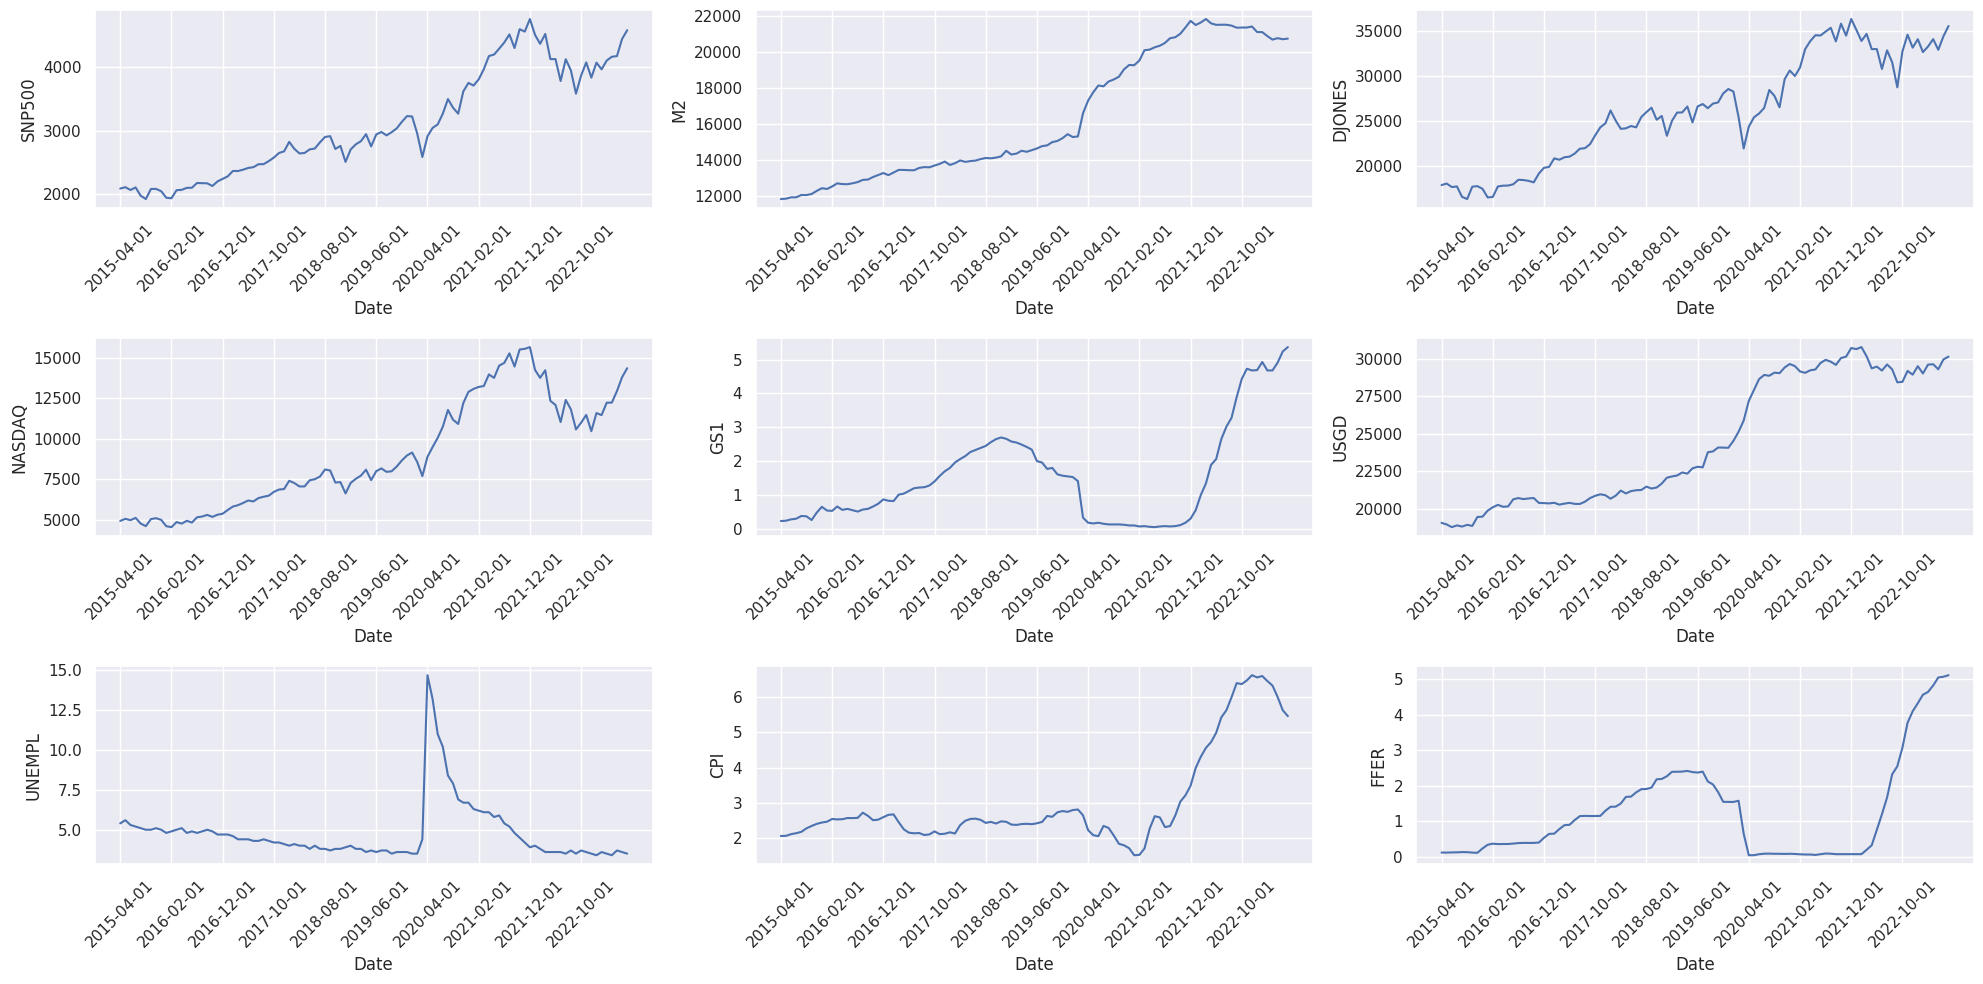

In [126]:
sns.set_context('notebook')
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(3, 3 , figsize=(20, 10))
clmns = ['SNP500' ,  'M2', 'DJONES', 'NASDAQ', 'GS1', 'USGD', 'UNEMPL', 'CPI', 'FFER']

for i, ax in enumerate(axes.flatten()):
    column = clmns[i]

    sns.lineplot(x= data.index, y= column, data=data, ax=ax)
    plt.sca(ax)  # Установите текущую ось для графика
    plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], rotation=45)




plt.tight_layout()
plt.show()


Диаграммы рассеяния:

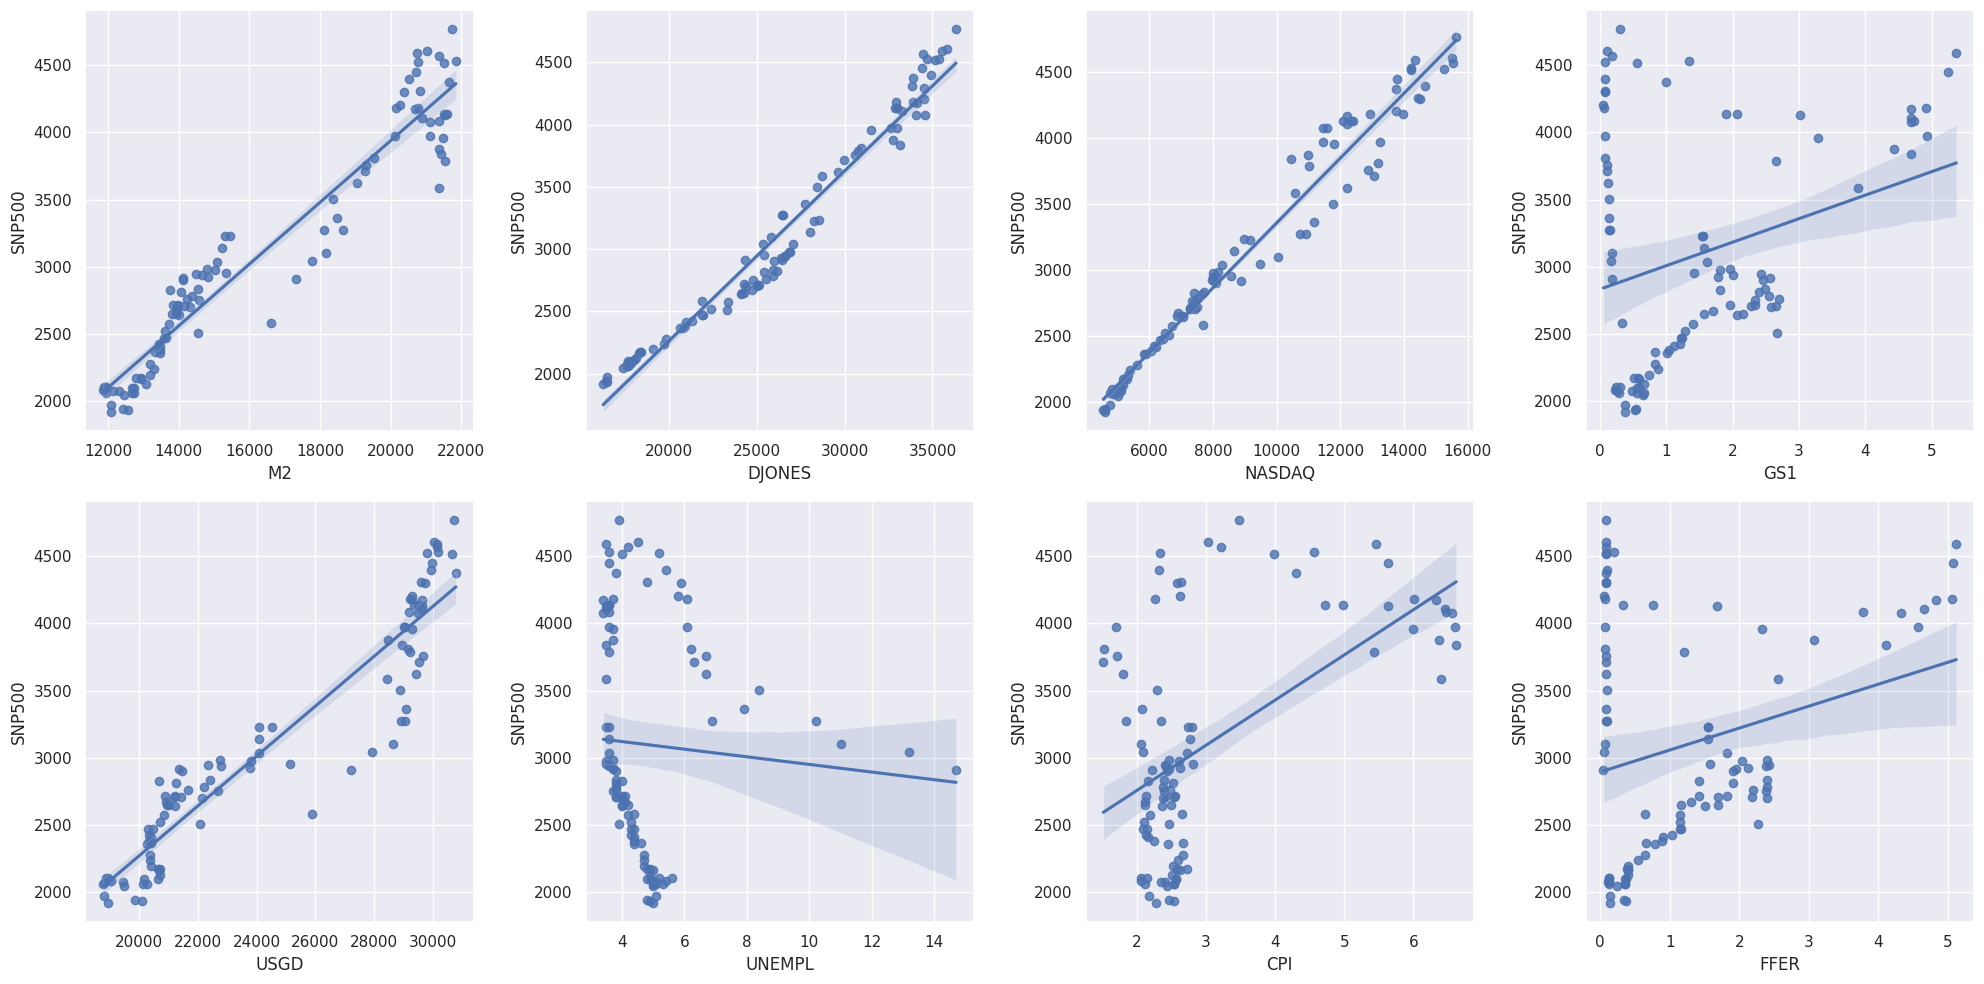

In [127]:


sns.set_context('notebook')
sns.set_theme(style="darkgrid")

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
clmns = [ 'M2', 'DJONES', 'NASDAQ', 'GS1', 'USGD', 'UNEMPL', 'CPI', 'FFER']

for i, ax in enumerate(axes.flatten()):
    column = clmns[i]

    sns.regplot(x=column, y="SNP500", data=data, ax=ax)


plt.tight_layout()
plt.show()



### Построение множественной регрессии МНК

In [128]:
# Строим
linear_regression = smf.ols('SNP500 ~ M2+DJONES+NASDAQ+GS1+USGD+UNEMPL+CPI+FFER', data = data).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     7801.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          1.49e-125
Time:                        09:16:29   Log-Likelihood:                -488.11
No. Observations:                 100   AIC:                             994.2
Df Residuals:                      91   BIC:                             1018.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    544.3458     55.678      9.777      0.0

## Тест Рамсея

In [129]:
# Параметры power : [2] - только квадраты , [3] - только кубы , [2,3] - квадраты и кубы.
powers = [ [2] , [3] , [2,3] ]
p_dict = {'[2]' : 'Только квадраты' ,
          '[3]' : 'Только кубы' ,
           '[2, 3]' : 'Квадраты и кубы'}

dists = []
# Use_f = True , Тестовая статистика определяется на распределении Фишера . В противном случае - Хи-квадрат
def RESET_ramsay_test(model , powers ):
  for power in powers :
    resettest = smd.linear_reset(res= model , power= power , use_f = True)
    dists.append( resettest.dist )
    print(p_dict[str(power)])
    print('Тестовая статистика' , resettest.distribution , resettest.fvalue)
    print(f'p-значение = P(F{int(resettest.df_num ), int( resettest.df_denom)} > {resettest.fvalue}) = {resettest.pvalue}')
    print()


RESET_ramsay_test( linear_regression , [ [2] , [3] , [2,3] ]  )
print(dists)

Только квадраты
Тестовая статистика F 31.63072175997472
p-значение = P(F(1, 90) > 31.63072175997472) = 2.0773136708671302e-07

Только кубы
Тестовая статистика F 35.9282891944595
p-значение = P(F(1, 90) > 35.9282891944595) = 4.170555693642525e-08

Квадраты и кубы
Тестовая статистика F 20.446677750175738
p-значение = P(F(2, 89) > 20.446677750175738) = 4.934426058494969e-08

[<scipy.stats._continuous_distns.f_gen object at 0x7ccdad6e97e0>, <scipy.stats._continuous_distns.f_gen object at 0x7ccdad6e97e0>, <scipy.stats._continuous_distns.f_gen object at 0x7ccdad6e97e0>]


In [130]:
dists.clear()

In [131]:
dists

[]

Ни один из трех вериантов теста рамсея не подтвердил адекватность спецификации модели на любом из стандартных уровней значимости. Необходимо добавить нелинейности в модель

Добавим квадраты и кубы регрессоров

In [132]:
counter = 0

In [133]:
sq_l_data = data

In [134]:
clmns = list(data.columns)
if counter == 0 :
  for column in clmns :
    if column != 'SNP500' :
      sq_l_data[f'sq_{column}'] = sq_l_data[column] ** 2
  for column in clmns :
    if column != 'SNP500' :
      sq_l_data[f'l_{column}'] = np.log(sq_l_data[column])

counter = 1
sq_l_data

,SNP500,M2,DJONES,NASDAQ,GS1,USGD,UNEMPL,CPI,FFER,sq_M2,...,sq_CPI,sq_FFER,l_M2,l_DJONES,l_NASDAQ,l_GS1,l_USGD,l_UNEMPL,l_CPI,l_FFER
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,2085.51,11852.8,17840.52,4941.42,0.23,19064.8,5.4,2.063124,0.124667,1.404889e+08,...,4.256479,0.015542,9.380319,9.789228,8.505408,-1.469676,9.855599,1.686399,0.724221,-2.082112
2015-05-01,2107.39,11873.4,18010.68,5070.03,0.24,18957.8,5.6,2.066887,0.123226,1.409776e+08,...,4.272021,0.015185,9.382056,9.798720,8.531102,-1.427116,9.849971,1.722767,0.726044,-2.093737
2015-06-01,2063.11,11947.4,17619.51,4986.87,0.28,18779.0,5.3,2.114733,0.129000,1.427404e+08,...,4.472094,0.016641,9.388269,9.776762,8.514564,-1.272966,9.840495,1.667707,0.748928,-2.047943
2015-07-01,2103.84,11949.6,17689.86,5128.28,0.30,18895.3,5.2,2.141448,0.130323,1.427929e+08,...,4.585798,0.016984,9.388453,9.780747,8.542526,-1.203973,9.846668,1.648659,0.761482,-2.037743
2015-08-01,1972.18,12076.4,16528.03,4776.51,0.38,18816.9,5.1,2.180240,0.138065,1.458394e+08,...,4.753446,0.019062,9.399008,9.712813,8.471465,-0.967584,9.842511,1.629241,0.779435,-1.980034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4109.31,20896.8,33274.15,12221.91,4.68,29613.8,3.5,6.451708,4.649032,4.366763e+08,...,41.624540,21.613501,9.947351,10.412536,9.410986,1.543298,10.295996,1.252763,1.864345,1.536659
2023-04-01,4169.48,20700.6,34098.16,12226.58,4.68,29639.7,3.4,6.322749,4.830000,4.285148e+08,...,39.977151,23.328900,9.937918,10.436999,9.411368,1.543298,10.296870,1.223775,1.844154,1.574846
2023-05-01,4179.83,20781.6,32908.27,12935.29,4.91,29302.2,3.7,6.000606,5.055806,4.318749e+08,...,36.007267,25.561179,9.941823,10.401479,9.467715,1.591274,10.285418,1.308333,1.791860,1.620537


Построим новую модель, учитывая нелинейности (новые регрессоры)

In [135]:
linear_regression_with_sq_l = smf.ols('SNP500 ~ M2+DJONES+NASDAQ+GS1+USGD+UNEMPL+CPI+FFER+sq_M2+sq_DJONES+sq_NASDAQ+sq_GS1+sq_USGD+sq_UNEMPL+sq_CPI+sq_FFER+l_M2+l_DJONES+l_NASDAQ+l_GS1+l_USGD+l_UNEMPL+l_CPI+l_FFER', data = sq_l_data).fit()
print(linear_regression_with_sq_l.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.250e+04
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          2.15e-125
Time:                        09:16:29   Log-Likelihood:                -400.01
No. Observations:                 100   AIC:                             850.0
Df Residuals:                      75   BIC:                             915.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4936   4.83e+04      0.000      1.0

## Повторим тест Рамсея

In [136]:
RESET_ramsay_test(   linear_regression_with_sq_l , [ [2]] )

Только квадраты
Тестовая статистика F 0.07814463715563903
p-значение = P(F(1, 74) > 0.07814463715563903) = 0.7806075230820751



Тестовая статистика = 0.078 ; р-начение = 78,06 %. На всех стандартных уровнях значимости нулевая гипотеза не отвергается, спецификация модели адекватна. Функция плотности распределения вероятностей тестовой статистики в случае, когда верна нулевая гипотеза:

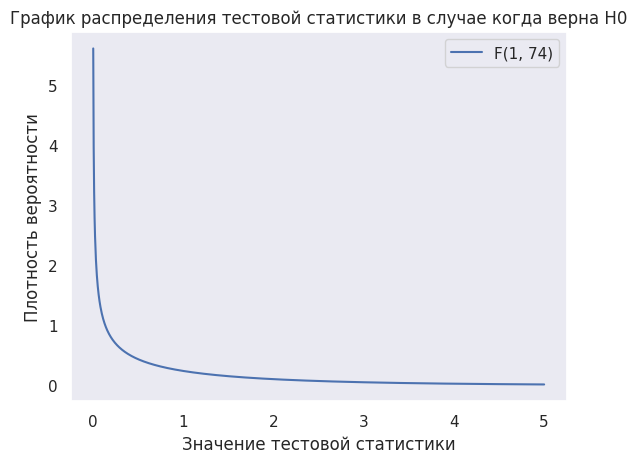

In [137]:
def Fisher_dist( dfn , dfd ) :


  x = np.linspace(0, 5, 1000)  # Например, от 0 до 5 с шагом 0.005
  pdf_values = SS.f.pdf(x, dfn, dfd)
  plt.plot(x, pdf_values, label=f'F({dfn}, {dfd})')
  plt.xlabel('Значение тестовой статистики')
  plt.ylabel('Плотность вероятности')
  plt.title('График распределения тестовой статистики в случае когда верна H0')
  plt.legend()
  plt.grid()
  plt.show()

Fisher_dist(1,74)

### Тест фишера на значимость модели в целом

In [138]:
print(linear_regression_with_sq_l.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.250e+04
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          2.15e-125
Time:                        09:16:29   Log-Likelihood:                -400.01
No. Observations:                 100   AIC:                             850.0
Df Residuals:                      75   BIC:                             915.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4936   4.83e+04      0.000      1.0

## Тестовая статистика 1.250e+04 ; р-значение =  2.15e-125< 1 %; на всех стандартных уровнях значимости нулевая гипотеза отвергается, модель − значима. Функция плотности распределения вероятностей тестовой статистики в случае, когда верна нулевая гипотеза:

Тестовая статистика будет иметь распределение Фишера со степенями свободы 24 и 75. 24 = k2-k1 = разность количества параметров незначимой и значимой моделей , 75 = 100 - 25 = n - k2 = разность количества наблюдений и количества параметров исходной модели linear_regression_with_sq_l
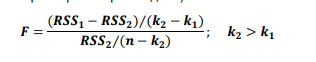

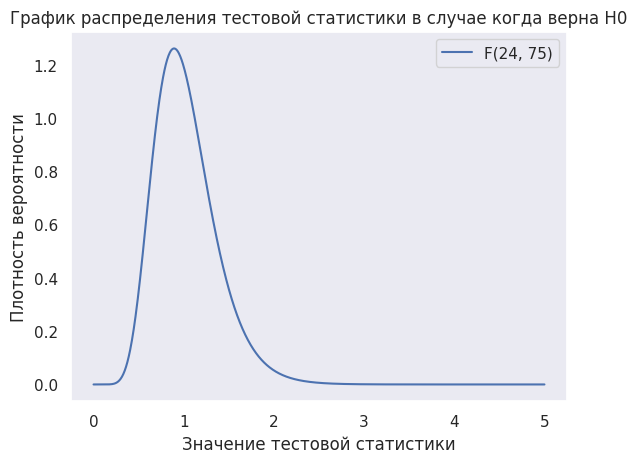

In [139]:
Fisher_dist(24,75)

## Тест стьюдента

Коэффициенты при регрессорах DJONES , NASDAQ , GS1 , sq_DJONES , sq_NASDAQ , sq_GS1 , l_DJONES , l_NASDAQ , l_GS1 , l_FFER значимы на всех стандартных уровнях значимости;

коэффициент при регрессоре sq_FFER значим на 10% уровне значимости;

коэффициенты при регрессорах M2 , USGD , UNEMPL , CPI , FFER , sq_M2 , sq_USGD , sq_UNEMPL , sq_CPI , l_M2 , l_USGD , l_UNEMPL , l_CPI и константа  не значимы.

Функция плотности распределения вероятностей тестовой статистики в случае, когда верна нулевая гипотеза:

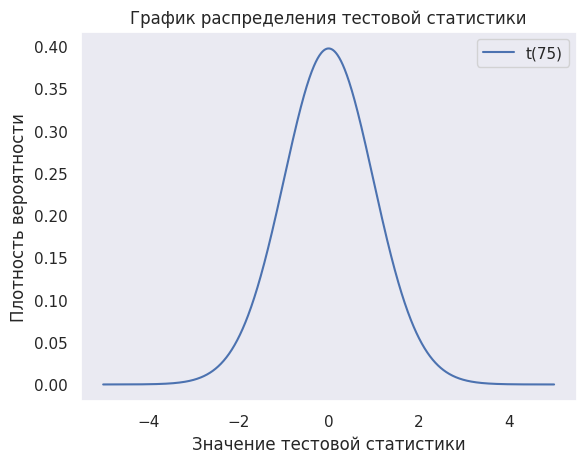

In [140]:
def Student_dist( s ) :


  x = np.linspace(-5, 5, 1000)  # Например, от 0 до 5 с шагом 0.005
  pdf_values = SS.t.pdf(x, s)
  plt.plot(x, pdf_values, label=f't({s})')
  plt.xlabel('Значение тестовой статистики')
  plt.ylabel('Плотность вероятности')
  plt.title('График распределения тестовой статистики')
  plt.legend()
  plt.grid()
  plt.show()

Student_dist(75)

**Анализ мультиколлинеарности; Корреляционная матрица; Индекс**

Метод инфляционных факторов (VIF)

In [141]:


# get y and X dataframes based on this regression:
y, X = dmatrices('SNP500 ~ M2+DJONES+NASDAQ+GS1+USGD+UNEMPL+CPI+FFER+sq_M2+sq_DJONES+sq_NASDAQ+sq_GS1+sq_USGD+sq_UNEMPL+sq_CPI+sq_FFER+l_M2+l_DJONES+l_NASDAQ+l_GS1+l_USGD+l_UNEMPL+l_CPI+l_FFER', sq_l_data, return_type='dataframe')
clmns = list(sq_l_data.columns)
VIFs = []
for column in sq_l_data :

  c = clmns.index(column)
  vif = variance_inflation_factor(X.values, c)
  VIFs.append(vif)


VIF_matrix = pd.DataFrame( { 'VIF' : VIFs , 'Columns' : list(sq_l_data.columns)})
VIF_matrix = VIF_matrix.drop(0)
VIF_matrix.transpose()


,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
VIF,4984540.515785,215638.210422,89948.109782,648.739297,3002699.86943,6633.516701,19378.26144,435.130032,1326762.143708,54844.863575,...,5787.328344,189.774065,1150766.853823,54800.792778,23271.777463,242.703991,737285.19157,2336.493426,3435.946003,96.294734
Columns,M2,DJONES,NASDAQ,GS1,USGD,UNEMPL,CPI,FFER,sq_M2,sq_DJONES,...,sq_CPI,sq_FFER,l_M2,l_DJONES,l_NASDAQ,l_GS1,l_USGD,l_UNEMPL,l_CPI,l_FFER


Матрица корреляций

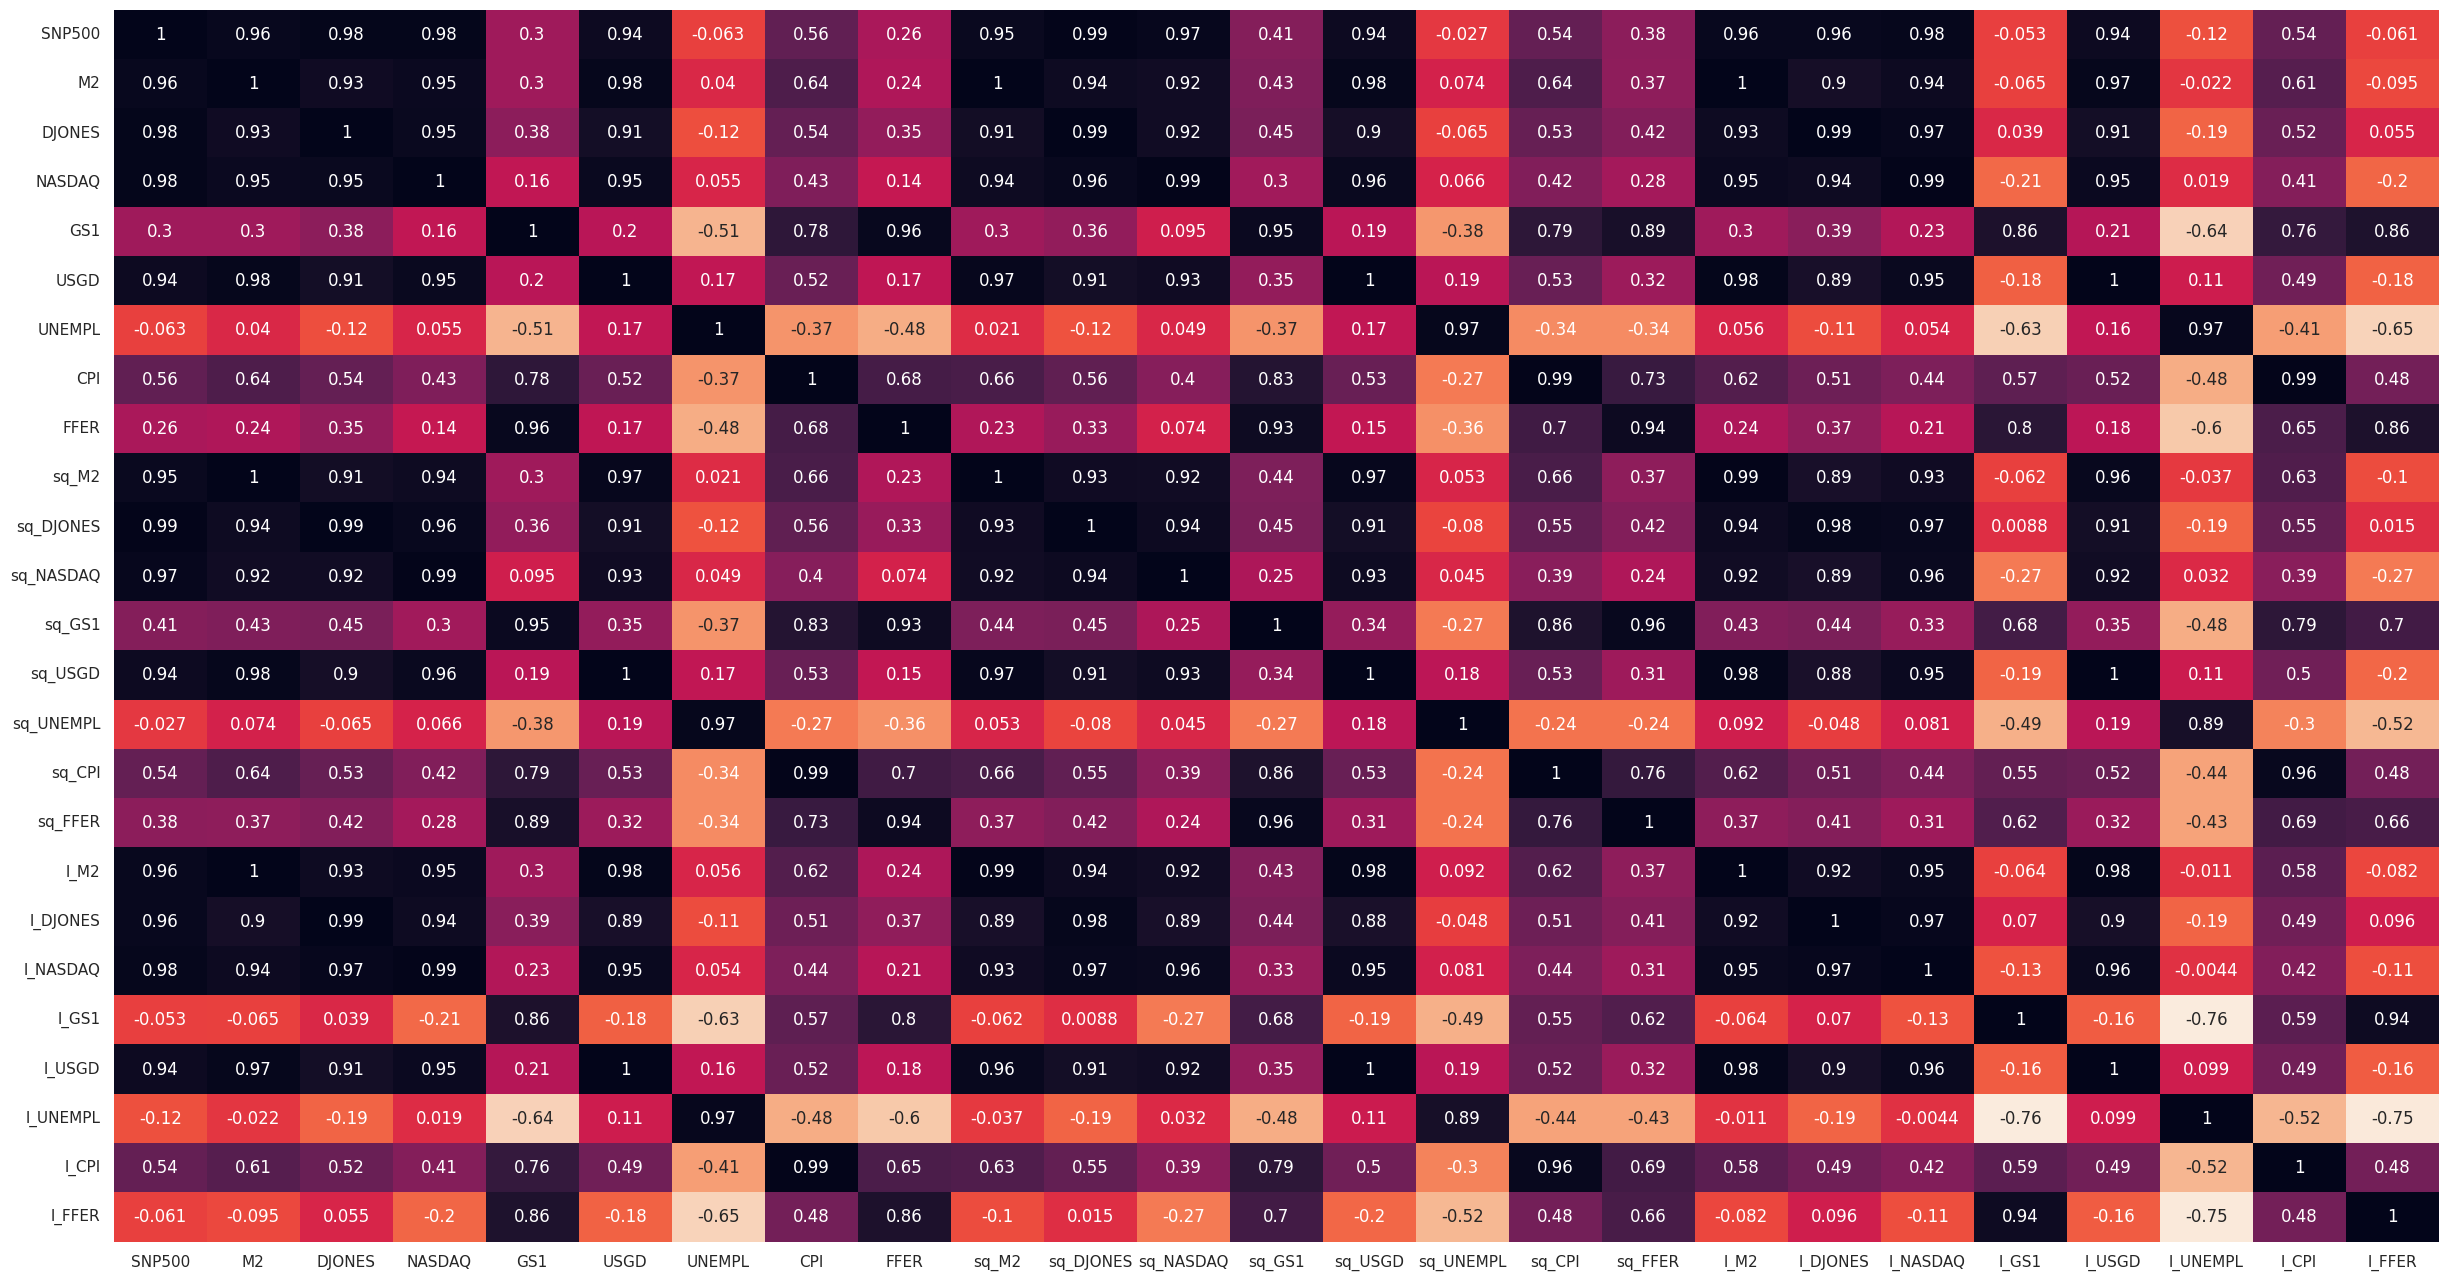

In [142]:
cols = list(data.columns)
plt.figure(figsize=(30, 16))
hm = sns.heatmap(data[cols].corr(), cbar = False, annot = True , cmap ='rocket_r')
 # Пример размера (10 дюймов в ширину, 8 дюймов в высоту)

# Покажите тепловую карту
plt.show()

Строим Индекс характеризующий состояние фондового рынка США из следующих показателей:
 1. DJONES - Промышленный индекс Доу-Джонса

2. NASDAQ - Фондовый индекс NASDAQ

Регрессоры которые мы будем объединять в индекс.

In [143]:
FondMarketIndex = sq_l_data[['DJONES' , 'NASDAQ' , 'sq_DJONES' , 'sq_NASDAQ' , 'l_DJONES' , 'l_NASDAQ']]
FondMarketIndex

,DJONES,NASDAQ,sq_DJONES,sq_NASDAQ,l_DJONES,l_NASDAQ
Date,,,,,,
2015-04-01,17840.52,4941.42,3.182842e+08,2.441763e+07,9.789228,8.505408
2015-05-01,18010.68,5070.03,3.243846e+08,2.570520e+07,9.798720,8.531102
2015-06-01,17619.51,4986.87,3.104471e+08,2.486887e+07,9.776762,8.514564
2015-07-01,17689.86,5128.28,3.129311e+08,2.629926e+07,9.780747,8.542526
2015-08-01,16528.03,4776.51,2.731758e+08,2.281505e+07,9.712813,8.471465
...,...,...,...,...,...,...
2023-03-01,33274.15,12221.91,1.107169e+09,1.493751e+08,10.412536,9.410986
2023-04-01,34098.16,12226.58,1.162685e+09,1.494893e+08,10.436999,9.411368
2023-05-01,32908.27,12935.29,1.082954e+09,1.673217e+08,10.401479,9.467715


In [144]:
def pca_test( index_name ) :
    n_components = len( index_name.columns )

    pca_test = PCA(n_components= n_components)
    pca_test.fit( index_name )
    sns.set(style='whitegrid')
    plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.axvline(linewidth=4, color='r', linestyle = '--', x=1, ymin=0, ymax=1)
    display(plt.show())
    evr = pca_test.explained_variance_ratio_
    cvr = np.cumsum(pca_test.explained_variance_ratio_)
    pca_df = pd.DataFrame()
    pca_df['Интегральная'] = cvr
    pca_df['Доля'] = evr
    #pca_df['Собственные значения'] = pca_test.singular_values_
    display(pca_df.head(10))

    pca_dims = []
    lst = [ 1 , 2 ,3 ,4 ,5 ,6 ]
    for x in lst :
        pca_dims.append('PCA Component {}'.format(x))

    pca_test_df = pd.DataFrame( pca_test.components_, columns= list(index_name.columns) , index=pca_dims)
    print('Посчитаем собственные векторы (нагрузку на компоненты)')
    display(pca_test_df.head(6).T)

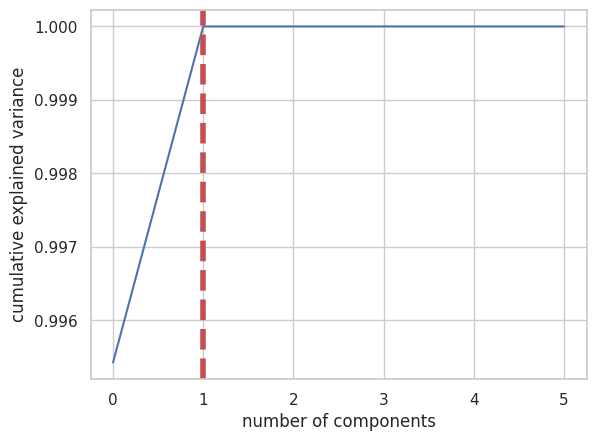

None

,Интегральная,Доля
0,0.995427,9.954272e-01
1,1.000000,4.572751e-03
2,1.000000,3.884751e-12
3,1.000000,2.479536e-13
4,1.000000,4.341429e-22
5,1.000000,2.705010e-23


Посчитаем собственные векторы (нагрузку на компоненты)


,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6
DJONES,1.852754e-05,-1.592012e-05,0.854832,0.518904,-5.695447e-05,7.259478e-05
NASDAQ,1.003058e-05,3.626667e-05,0.518904,-0.854832,-1.712227e-04,-5.426170e-05
sq_DJONES,9.814053e-01,-1.919470e-01,-0.000020,-0.000009,8.063399e-10,-6.684975e-10
sq_NASDAQ,1.919470e-01,9.814053e-01,-0.000009,0.000038,3.643312e-09,1.340170e-09
l_DJONES,7.228140e-10,-1.130094e-09,0.000069,0.000051,2.612013e-01,-9.652843e-01
l_NASDAQ,1.132537e-09,2.255655e-09,0.000124,-0.000135,9.652843e-01,2.612013e-01


In [145]:
pca_test(FondMarketIndex)

Добавляем Главные компоненты с собственным значением больше среднего, в нашем случае - это только первая Главная компонента, она берет на себя 99,5
% дисперсии.

In [146]:
pca = PCA(n_components=1)
pca.fit(FondMarketIndex)
FondMarketIndex_с = pca.transform(FondMarketIndex)


In [147]:
len(FondMarketIndex_с)

100

In [148]:
FondMarketIndex_с

array([[-4.06463944e+08],
       [-4.00229794e+08],
       [-4.14068623e+08],
       [-4.11356241e+08],
       [-4.51041156e+08],
       [-4.59159014e+08],
       [-4.12415102e+08],
       [-4.10350148e+08],
       [-4.20717950e+08],
       [-4.53333033e+08],
       [-4.51806673e+08],
       [-4.12017798e+08],
       [-4.09111248e+08],
       [-4.08315704e+08],
       [-4.03508522e+08],
       [-3.84971697e+08],
       [-3.86003559e+08],
       [-3.89144726e+08],
       [-3.95321014e+08],
       [-3.59165492e+08],
       [-3.34656349e+08],
       [-3.30220359e+08],
       [-2.91907674e+08],
       [-2.97778992e+08],
       [-2.86145310e+08],
       [-2.82985316e+08],
       [-2.68948164e+08],
       [-2.45471230e+08],
       [-2.42822198e+08],
       [-2.22763169e+08],
       [-1.78495342e+08],
       [-1.36254853e+08],
       [-1.14691280e+08],
       [-4.18972224e+07],
       [-9.85512346e+07],
       [-1.43782801e+08],
       [-1.40931116e+08],
       [-1.27837264e+08],
       [-1.3

In [149]:

sq_l_data['FondMarketIndex'] = FondMarketIndex_с

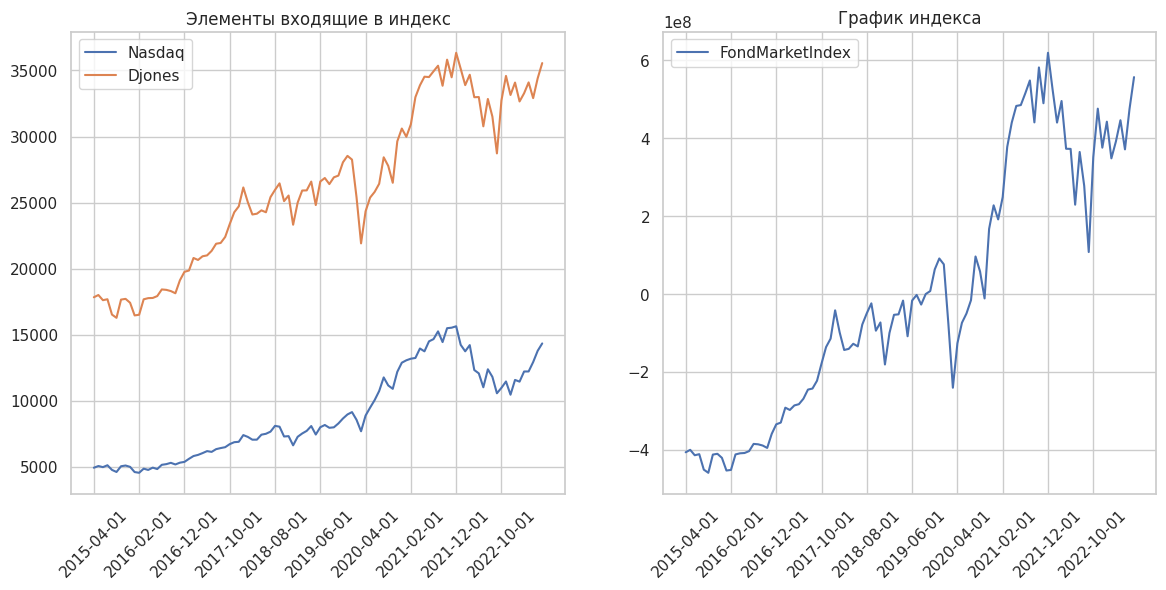

In [150]:

x = sq_l_data.index


# Создание объекта сетки
grid = GridSpec(1, 2)
plt.figure(figsize=(14, 6))
# Создание подграфиков
plt.subplot(grid[0, 0])

plt.plot(x, sq_l_data['NASDAQ'] , label = 'Nasdaq')
plt.plot(x, sq_l_data['DJONES'] , label = 'Djones')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], rotation=45)
plt.title('Элементы входящие в индекс')
plt.legend()

plt.subplot(grid[0, 1])

plt.plot(x, sq_l_data['FondMarketIndex'] , label = 'FondMarketIndex')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], rotation=45)
plt.title('График индекса')

plt.legend()
# Отображение графиков
plt.show()

In [151]:
sq_l_data.drop(columns = ['DJONES' , 'NASDAQ' , 'sq_DJONES' , 'sq_NASDAQ' , 'l_DJONES' , 'l_NASDAQ'] , inplace = True)

Индекс2

Строим Индекс характеризующий фискально-монетарную политику США из следующих показателей:
 1.  M2 - Денежный агрегат M2 США

2.  USGD - Рыночная стоимость гос.долга США

In [152]:
MonetaryFiscalIndex = sq_l_data[['M2' , 'USGD' , 'sq_M2' , 'sq_USGD' , 'l_M2' , 'l_USGD']]
MonetaryFiscalIndex

,M2,USGD,sq_M2,sq_USGD,l_M2,l_USGD
Date,,,,,,
2015-04-01,11852.8,19064.8,1.404889e+08,3.634666e+08,9.380319,9.855599
2015-05-01,11873.4,18957.8,1.409776e+08,3.593982e+08,9.382056,9.849971
2015-06-01,11947.4,18779.0,1.427404e+08,3.526508e+08,9.388269,9.840495
2015-07-01,11949.6,18895.3,1.427929e+08,3.570324e+08,9.388453,9.846668
2015-08-01,12076.4,18816.9,1.458394e+08,3.540757e+08,9.399008,9.842511
...,...,...,...,...,...,...
2023-03-01,20896.8,29613.8,4.366763e+08,8.769772e+08,9.947351,10.295996
2023-04-01,20700.6,29639.7,4.285148e+08,8.785118e+08,9.937918,10.296870
2023-05-01,20781.6,29302.2,4.318749e+08,8.586189e+08,9.941823,10.285418


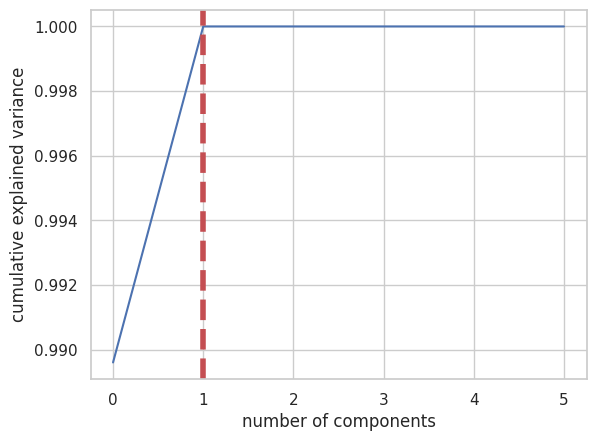

None

,Интегральная,Доля
0,0.9896,9.896003e-01
1,1.0000,1.039969e-02
2,1.0000,8.426551e-13
3,1.0000,6.277600e-14
4,1.0000,2.302477e-23
5,1.0000,1.529386e-24


Посчитаем собственные векторы (нагрузку на компоненты)


,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6
M2,1.430970e-05,-2.004447e-05,-0.648189,-0.761480,-1.064080e-04,-6.598697e-05
USGD,1.750613e-05,1.191987e-05,-0.761480,0.648189,-4.776308e-05,6.716429e-05
sq_M2,4.851149e-01,-8.744504e-01,0.000014,0.000020,1.603997e-09,9.723035e-10
sq_USGD,8.744504e-01,4.851149e-01,0.000018,-0.000012,5.406232e-10,-6.548171e-10
l_M2,8.607666e-10,-8.730942e-10,-0.000084,-0.000093,8.407327e-01,5.414504e-01
l_USGD,7.097015e-10,5.740630e-10,-0.000064,0.000052,5.414504e-01,-8.407327e-01


In [153]:
pca_test(MonetaryFiscalIndex)

Добавляем Главные компоненты с собственным значением больше среднего, в нашем случае - это только первая Главная компонента, она берет на себя 98,96 % дисперсии.

In [154]:
pca = PCA(n_components=1)
pca.fit(MonetaryFiscalIndex)
MonetaryFiscalIndex_с = pca.transform(MonetaryFiscalIndex)


In [155]:
pd.DataFrame(MonetaryFiscalIndex_с).head(10)

,0
0,-2.885503e+08
1,-2.918708e+08
2,-2.969159e+08
3,-2.930590e+08
4,-2.941665e+08
5,-2.903952e+08
6,-2.920731e+08
7,-2.700476e+08
8,-2.675537e+08
9,-2.542894e+08


In [156]:

sq_l_data['MonetaryFiscalIndex'] = MonetaryFiscalIndex_с

Графики построенного индекса и составляющих его переменных:

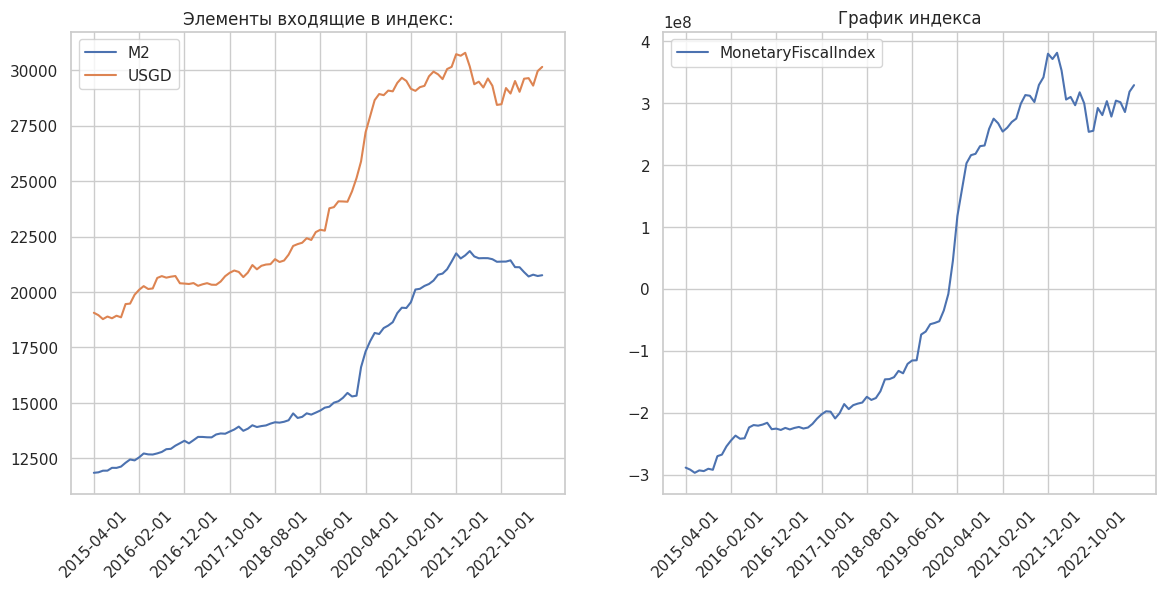

In [157]:
x = sq_l_data.index


# Создание объекта сетки
grid = GridSpec(1, 2)
plt.figure(figsize=(14, 6))
# Создание подграфиков
plt.subplot(grid[0, 0])

plt.plot(x, sq_l_data['M2'] , label = 'M2')
plt.plot(x, sq_l_data['USGD'] , label = 'USGD')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], rotation=45)
plt.title('Элементы входящие в индекс:')
plt.legend()

plt.subplot(grid[0, 1])

plt.plot(x, sq_l_data['MonetaryFiscalIndex'] , label = 'MonetaryFiscalIndex')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90], rotation=45)
plt.title('График индекса')

plt.legend()
# Отображение графиков
plt.show()

In [158]:
sq_l_data.drop(columns = ['M2' , 'USGD' , 'sq_M2' , 'sq_USGD' , 'l_M2' , 'l_USGD'] , inplace = True)

Проведем тест рамсея еще раз

In [159]:
# Не оснований отвергать нулевую гипотезу "спецификация модели адекватна"

In [160]:
linear_regression = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+sq_GS1+sq_UNEMPL+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex', data = sq_l_data).fit()
RESET_ramsay_test(   linear_regression, [ [2]] )

Только квадраты
Тестовая статистика F 0.06155924750323879
p-значение = P(F(1, 84) > 0.06155924750323879) = 0.804653778907673



In [161]:
sq_l_data

,SNP500,GS1,UNEMPL,CPI,FFER,sq_GS1,sq_UNEMPL,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,FondMarketIndex,MonetaryFiscalIndex
Date,,,,,,,,,,,,,,,
2015-04-01,2085.51,0.23,5.4,2.063124,0.124667,0.0529,29.16,4.256479,0.015542,-1.469676,1.686399,0.724221,-2.082112,-4.064639e+08,-2.885503e+08
2015-05-01,2107.39,0.24,5.6,2.066887,0.123226,0.0576,31.36,4.272021,0.015185,-1.427116,1.722767,0.726044,-2.093737,-4.002298e+08,-2.918708e+08
2015-06-01,2063.11,0.28,5.3,2.114733,0.129000,0.0784,28.09,4.472094,0.016641,-1.272966,1.667707,0.748928,-2.047943,-4.140686e+08,-2.969159e+08
2015-07-01,2103.84,0.30,5.2,2.141448,0.130323,0.0900,27.04,4.585798,0.016984,-1.203973,1.648659,0.761482,-2.037743,-4.113562e+08,-2.930590e+08
2015-08-01,1972.18,0.38,5.1,2.180240,0.138065,0.1444,26.01,4.753446,0.019062,-0.967584,1.629241,0.779435,-1.980034,-4.510412e+08,-2.941665e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4109.31,4.68,3.5,6.451708,4.649032,21.9024,12.25,41.624540,21.613501,1.543298,1.252763,1.864345,1.536659,3.917371e+08,3.041741e+08
2023-04-01,4169.48,4.68,3.4,6.322749,4.830000,21.9024,11.56,39.977151,23.328900,1.543298,1.223775,1.844154,1.574846,4.462422e+08,3.015569e+08
2023-05-01,4179.83,4.91,3.7,6.000606,5.055806,24.1081,13.69,36.007267,25.561179,1.591274,1.308333,1.791860,1.620537,3.714173e+08,2.857916e+08


Тест на избыточные переменные

In [162]:
list(sq_l_data.columns)

['SNP500',
 'GS1',
 'UNEMPL',
 'CPI',
 'FFER',
 'sq_GS1',
 'sq_UNEMPL',
 'sq_CPI',
 'sq_FFER',
 'l_GS1',
 'l_UNEMPL',
 'l_CPI',
 'l_FFER',
 'FondMarketIndex',
 'MonetaryFiscalIndex']

In [163]:
#Проверяем на избыточность незначимые регрессоры sq_GS1 и sq_UNEMPL

In [164]:
linear_regression = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_GS1+sq_UNEMPL+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex', data = sq_l_data).fit()
print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1721.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           6.50e-98
Time:                        09:16:33   Log-Likelihood:                -532.18
No. Observations:                 100   AIC:                             1094.
Df Residuals:                      85   BIC:                             1133.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2604.8652    

In [165]:
linear_regression.__dict__

{'_results': <statsmodels.regression.linear_model.OLSResults at 0x7ccda2b3fc70>,
 '__doc__': "\n    Results class for for an OLS model.\n\n    Parameters\n    ----------\n    model : RegressionModel\n        The regression model instance.\n    params : ndarray\n        The estimated parameters.\n    normalized_cov_params : ndarray\n        The normalized covariance parameters.\n    scale : float\n        The estimated scale of the residuals.\n    cov_type : str\n        The covariance estimator used in the results.\n    cov_kwds : dict\n        Additional keywords used in the covariance specification.\n    use_t : bool\n        Flag indicating to use the Student's t in inference.\n    **kwargs\n        Additional keyword arguments used to initialize the results.\n\n    See Also\n    --------\n    RegressionResults\n        Results store for WLS and GLW models.\n\n    Notes\n    -----\n    Most of the methods and attributes are inherited from RegressionResults.\n    The special methods 

In [166]:
residuals1 = (sq_l_data['SNP500'] - linear_regression.fittedvalues ) ** 2
residuals1

Date
2015-04-01     372.811219
2015-05-01    1125.163770
2015-06-01     340.685879
2015-07-01    2488.674101
2015-08-01       0.331211
                 ...     
2023-03-01    1751.001856
2023-04-01    1851.453007
2023-05-01    5220.640688
2023-06-01    3240.274055
2023-07-01       2.108799
Length: 100, dtype: float64

In [167]:
linear_regression_delete_variables = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex', data = sq_l_data).fit()
print(linear_regression_delete_variables.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2054.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          3.21e-101
Time:                        09:16:33   Log-Likelihood:                -532.20
No. Observations:                 100   AIC:                             1090.
Df Residuals:                      87   BIC:                             1124.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2602.7831    

In [168]:
residuals2 = (sq_l_data['SNP500'] - linear_regression_delete_variables.fittedvalues ) ** 2
residuals2

Date
2015-04-01     367.702011
2015-05-01    1119.921706
2015-06-01     340.438665
2015-07-01    2491.208511
2015-08-01       0.350647
                 ...     
2023-03-01    1574.956230
2023-04-01    2108.707879
2023-05-01    4923.603674
2023-06-01    3430.752636
2023-07-01       2.616495
Length: 100, dtype: float64

In [169]:
res_sum_1 = sum(residuals1)
res_sum_1

245481.33902718872

In [170]:
res_sum_2 = sum(residuals2)
res_sum_2

245557.72513874908

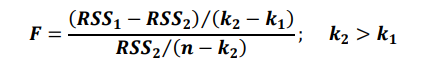

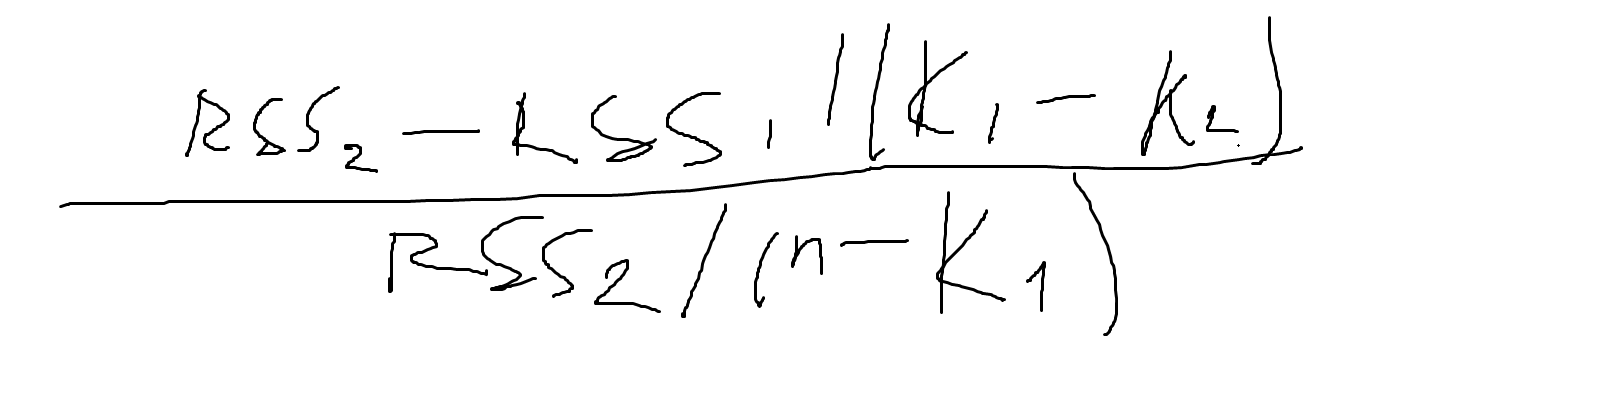

In [171]:
F_stat = (res_sum_2 - res_sum_1 ) * 85 / (res_sum_2 * 2 )

In [172]:
F_stat

0.013220556345686826

In [173]:
dfn = 2  # степени свободы в числителе
dfd = 85  # степени свободы в знаменателе
value = 0.013220556317070737

p_val = 1 - SS.f.cdf(value, dfn, dfd)
print("p value:", p_val)

p value: 0.9868684802325411


Не отвергаем нулевую гипотезу . Переменные избыточные.

Посмотрим на результаты теста Рамсея.

In [174]:
RESET_ramsay_test(   linear_regression, [ [2]] ) # До удаления

Только квадраты
Тестовая статистика F 0.061558933885863684
p-значение = P(F(1, 84) > 0.061558933885863684) = 0.8046542662678223



In [175]:
RESET_ramsay_test(linear_regression_delete_variables , [[2]] )

Только квадраты
Тестовая статистика F 0.02682260040746319
p-значение = P(F(1, 86) > 0.02682260040746319) = 0.8702917145903762



Результаты теста рамсея значительно улучшились. Мы можем убрать избыточные переменные.

In [176]:
# Наша модель
linear_regression = linear_regression_delete_variables

In [177]:
sq_l_data.drop(columns = ['sq_GS1' , 'sq_UNEMPL' ] , inplace = True)
sq_l_data

,SNP500,GS1,UNEMPL,CPI,FFER,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,FondMarketIndex,MonetaryFiscalIndex
Date,,,,,,,,,,,,,
2015-04-01,2085.51,0.23,5.4,2.063124,0.124667,4.256479,0.015542,-1.469676,1.686399,0.724221,-2.082112,-4.064639e+08,-2.885503e+08
2015-05-01,2107.39,0.24,5.6,2.066887,0.123226,4.272021,0.015185,-1.427116,1.722767,0.726044,-2.093737,-4.002298e+08,-2.918708e+08
2015-06-01,2063.11,0.28,5.3,2.114733,0.129000,4.472094,0.016641,-1.272966,1.667707,0.748928,-2.047943,-4.140686e+08,-2.969159e+08
2015-07-01,2103.84,0.30,5.2,2.141448,0.130323,4.585798,0.016984,-1.203973,1.648659,0.761482,-2.037743,-4.113562e+08,-2.930590e+08
2015-08-01,1972.18,0.38,5.1,2.180240,0.138065,4.753446,0.019062,-0.967584,1.629241,0.779435,-1.980034,-4.510412e+08,-2.941665e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4109.31,4.68,3.5,6.451708,4.649032,41.624540,21.613501,1.543298,1.252763,1.864345,1.536659,3.917371e+08,3.041741e+08
2023-04-01,4169.48,4.68,3.4,6.322749,4.830000,39.977151,23.328900,1.543298,1.223775,1.844154,1.574846,4.462422e+08,3.015569e+08
2023-05-01,4179.83,4.91,3.7,6.000606,5.055806,36.007267,25.561179,1.591274,1.308333,1.791860,1.620537,3.714173e+08,2.857916e+08


In [178]:
data = deepcopy(sq_l_data)

Тесты на наличие структурного сдвига (Чоу, QLR) и тесты по проверке Гомоскедастичности

Тест Чоу


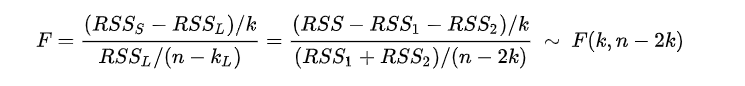

In [179]:
#Проведем проверку наличия структурного сдвига в апреле 2020 г. (пик пандемии COVID-19 в США) с помощью теста Чоу:

In [180]:
data.iloc[60]

SNP500                 2.912430e+03
GS1                    1.800000e-01
UNEMPL                 1.470000e+01
CPI                    2.226352e+00
FFER                   4.900000e-02
sq_CPI                 4.956643e+00
sq_FFER                2.401000e-03
l_GS1                 -1.714798e+00
l_UNEMPL               2.687847e+00
l_CPI                  8.003644e-01
l_FFER                -3.015935e+00
FondMarketIndex       -1.266554e+08
MonetaryFiscalIndex    1.178443e+08
Name: 2020-04-01, dtype: float64

In [181]:
res_model1 = data.iloc[:60]
res_model2 = data.iloc[60:]

Полная модель

In [182]:
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SNP500   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2054.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          3.21e-101
Time:                        09:16:34   Log-Likelihood:                -532.20
No. Observations:                 100   AIC:                             1090.
Df Residuals:                      87   BIC:                             1124.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2602.7831    443.768      5.865      0.000    1720.745    3484.821
GS1                     0.8314     35.221      0.024      0.981     -69.174      70.837
UNEMPL                 14.0023     27.692      0.506      0.614     -41.039      69.044
CPI                   975.3574    376.789      2.589      0.011     226.449    1724.265
FFER                  -82.6102     66.886     -1.235      0.220    -215.554      50.334
sq_CPI                -73.4256     25.740     -2.853      0.005    -124.586     -22.265
sq_FFER                14.7958      7.994      1.851      0.068      -1.094      30.686
l_GS1                  -7.2317     27.988     -0.258      0.797     -62.861      48.398
l_UNEMPL             -139.8188    238.295     -0.587      0.559    -613.456     333.819
l_CPI               -1399.6008    579.341     -2.416      0.018   -2551.103    -248.099
l_FFER                 13.1793     25.179      0.523      0.602     -36.867      63.225
FondMarketIndex       2.03e-06   8.66e-08     23.457      0.000    1.86e-06     2.2e-06
MonetaryFiscalIndex  7.294e-07   1.36e-07      5.346      0.000    4.58e-07       1e-06
==============================================================================
Omnibus:                        7.375   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                8.719
Skew:                           0.396   Prob(JB):                       0.0128
Kurtosis:                       4.210   Cond. No.                     5.87e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Остаточные модели

In [183]:
res_reg1 = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex', data = res_model1).fit()
print(res_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     731.8
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           3.88e-49
Time:                        09:16:34   Log-Likelihood:                -282.53
No. Observations:                  60   AIC:                             591.1
Df Residuals:                      47   BIC:                             618.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.711e+04   2

In [184]:
res_reg2 = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex', data = res_model2).fit()
print(res_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     224.9
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           8.38e-24
Time:                        09:16:34   Log-Likelihood:                -209.89
No. Observations:                  40   AIC:                             445.8
Df Residuals:                      27   BIC:                             467.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3376.9360    

In [185]:
rss_resid1 = sum(res_reg1.resid ** 2 )
rss_resid1

43229.605828853644

In [186]:
rss_resid2 = sum(res_reg2.resid ** 2 )
rss_resid2

84593.08260946731

In [187]:
rss_full = sum( linear_regression.resid ** 2 )
rss_full

245557.72513874908

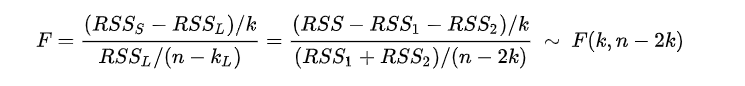

In [188]:
test_statistic_chow = (  ( rss_full - rss_resid1 - rss_resid2 ) / 13 ) / ( (rss_resid1 + rss_resid2) / (100 - 2 * 13) )
test_statistic_chow

5.243075883100076

In [189]:
dfn = 13  # степени свободы в числителе
dfd = 74  # степени свободы в знаменателе

p_val = 1 - SS.f.cdf(test_statistic_chow, dfn, dfd)
print("p value:", p_val)

p value: 1.5473522553266505e-06


Отвергаем H0 на 1% уровне значимости. Присутствует структурный сдвиг

QLR Тест

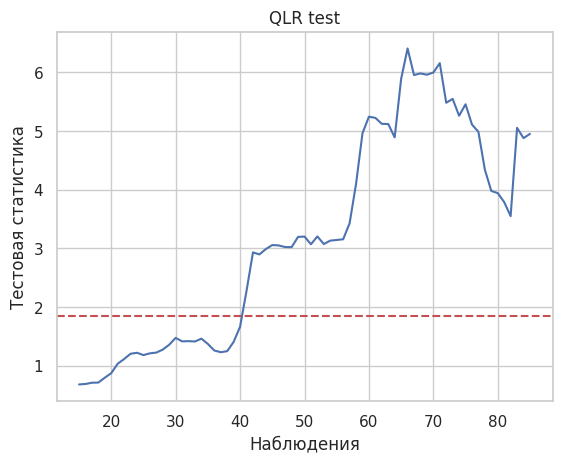

In [190]:
index = 15
indexes = []
test_statistics = []
p_values = []
while index < 86 :

  indexes.append(index)



  res_model1 = data.iloc[:index]
  res_model2 = data.iloc[index:]


  res_reg1 = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex', data = res_model1).fit()
  res_reg2 = smf.ols('SNP500 ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex', data = res_model2).fit()

  rss_resid1 = sum(res_reg1.resid ** 2 )
  rss_resid2 = sum(res_reg2.resid ** 2 )
  rss_full = sum( linear_regression.resid ** 2 )

  test_statistic_chow = (  ( rss_full - rss_resid1 - rss_resid2 ) / 13 ) / ( (rss_resid1 + rss_resid2) / (100 - 2 * 13) )

  dfn = 13  # степени свободы в числителе
  dfd = 74  # степени свободы в знаменателе

  test_statistics.append(test_statistic_chow )

  p_val = 1 - SS.f.cdf(test_statistic_chow, dfn, dfd)
  p_values.append(p_val)

  index += 1




plt.plot(indexes, test_statistics)
plt.xlabel('Наблюдения')
plt.ylabel('Тестовая статистика')
plt.title('QLR test')
plt.grid(True)
crit_value = SS.f.ppf(0.95, dfn, dfd)
plt.axhline(y=crit_value, color='r', linestyle='--')
plt.show()

In [191]:
max(test_statistics)



6.406490853508043

In [192]:
test_statistics.index(max(test_statistics))

51

In [193]:
p_values[51]

6.147879094697828e-08

Тестовая статистика QLR-теста = 6.406490853508043 : р-значение = 6.147879094697828e-08) < 1%.

Вывод: На всех стандартных уровнях значимости нулевая гипотеза отвергается, структурные изменения присутствуют.

Функция плотности распределения вероятностей тестовой статистики в случае, когда верна нулевая гипотеза:

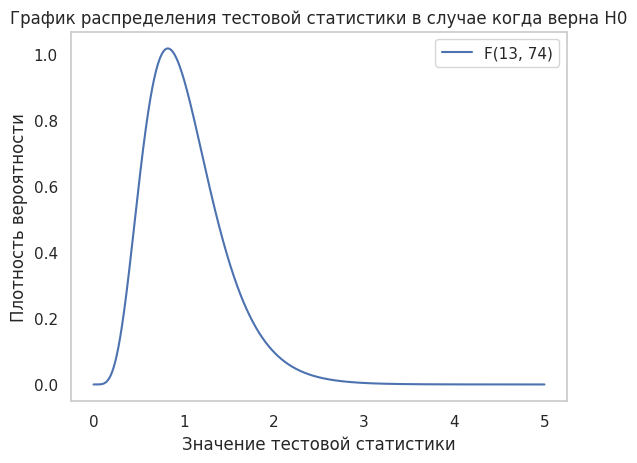

In [194]:
Fisher_dist(13,74)

Тесты по проверке гетероскедастичности

Тест Вайта (квадраты)

In [195]:
residuals_sq = linear_regression.resid ** 2
residuals_sq = pd.DataFrame( residuals_sq , columns = ['sq_residuals'])
residuals_sq

,sq_residuals
Date,
2015-04-01,367.702011
2015-05-01,1119.921706
2015-06-01,340.438665
2015-07-01,2491.208511
2015-08-01,0.350647
...,...
2023-03-01,1574.956230
2023-04-01,2108.707879
2023-05-01,4923.603674


In [196]:
regressors = data.drop( columns = ['SNP500'] , axis = 1 )
regressors

,GS1,UNEMPL,CPI,FFER,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,FondMarketIndex,MonetaryFiscalIndex
Date,,,,,,,,,,,,
2015-04-01,0.23,5.4,2.063124,0.124667,4.256479,0.015542,-1.469676,1.686399,0.724221,-2.082112,-4.064639e+08,-2.885503e+08
2015-05-01,0.24,5.6,2.066887,0.123226,4.272021,0.015185,-1.427116,1.722767,0.726044,-2.093737,-4.002298e+08,-2.918708e+08
2015-06-01,0.28,5.3,2.114733,0.129000,4.472094,0.016641,-1.272966,1.667707,0.748928,-2.047943,-4.140686e+08,-2.969159e+08
2015-07-01,0.30,5.2,2.141448,0.130323,4.585798,0.016984,-1.203973,1.648659,0.761482,-2.037743,-4.113562e+08,-2.930590e+08
2015-08-01,0.38,5.1,2.180240,0.138065,4.753446,0.019062,-0.967584,1.629241,0.779435,-1.980034,-4.510412e+08,-2.941665e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.68,3.5,6.451708,4.649032,41.624540,21.613501,1.543298,1.252763,1.864345,1.536659,3.917371e+08,3.041741e+08
2023-04-01,4.68,3.4,6.322749,4.830000,39.977151,23.328900,1.543298,1.223775,1.844154,1.574846,4.462422e+08,3.015569e+08
2023-05-01,4.91,3.7,6.000606,5.055806,36.007267,25.561179,1.591274,1.308333,1.791860,1.620537,3.714173e+08,2.857916e+08


In [197]:
counter = 0

In [198]:
regressors_white = deepcopy(regressors)

In [199]:
clmns = list(regressors.columns)
if counter == 0 :
  for column in clmns :
    if f'sq_{column}' not in clmns :
      regressors_white[f'sq_{column}'] = regressors_white[column] ** 2

  # for i in [0,1,2,3,4,5,6,7,8,9,10,11] :
  #   for j in [0,1,2,3,4,5,6,7,8,9,10,11]  :
  #     if j == i+ 1 :
  #       regressors_white[f'{clmns[i]}*{clmns[j]}'] = regressors_white[clmns[i]] * regressors_white[clmns[j]]



counter = 1
regressors_white

,GS1,UNEMPL,CPI,FFER,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,...,sq_GS1,sq_UNEMPL,sq_sq_CPI,sq_sq_FFER,sq_l_GS1,sq_l_UNEMPL,sq_l_CPI,sq_l_FFER,sq_FondMarketIndex,sq_MonetaryFiscalIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,0.23,5.4,2.063124,0.124667,4.256479,0.015542,-1.469676,1.686399,0.724221,-2.082112,...,0.0529,29.16,18.117613,0.000242,2.159947,2.843941,0.524496,4.335189,1.652129e+17,8.326127e+16
2015-05-01,0.24,5.6,2.066887,0.123226,4.272021,0.015185,-1.427116,1.722767,0.726044,-2.093737,...,0.0576,31.36,18.250167,0.000231,2.036661,2.967925,0.527139,4.383734,1.601839e+17,8.518858e+16
2015-06-01,0.28,5.3,2.114733,0.129000,4.472094,0.016641,-1.272966,1.667707,0.748928,-2.047943,...,0.0784,28.09,19.999624,0.000277,1.620442,2.781246,0.560894,4.194070,1.714528e+17,8.815905e+16
2015-07-01,0.30,5.2,2.141448,0.130323,4.585798,0.016984,-1.203973,1.648659,0.761482,-2.037743,...,0.0900,27.04,21.029546,0.000288,1.449551,2.718075,0.579855,4.152395,1.692140e+17,8.588356e+16
2015-08-01,0.38,5.1,2.180240,0.138065,4.753446,0.019062,-0.967584,1.629241,0.779435,-1.980034,...,0.1444,26.01,22.595245,0.000363,0.936219,2.654425,0.607519,3.920535,2.034381e+17,8.653393e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.68,3.5,6.451708,4.649032,41.624540,21.613501,1.543298,1.252763,1.864345,1.536659,...,21.9024,12.25,1732.602347,467.143423,2.381769,1.569415,3.475782,2.361321,1.534579e+17,9.252190e+16
2023-04-01,4.68,3.4,6.322749,4.830000,39.977151,23.328900,1.543298,1.223775,1.844154,1.574846,...,21.9024,11.56,1598.172573,544.237575,2.381769,1.497626,3.400904,2.480141,1.991321e+17,9.093657e+16
2023-05-01,4.91,3.7,6.000606,5.055806,36.007267,25.561179,1.591274,1.308333,1.791860,1.620537,...,24.1081,13.69,1296.523303,653.373866,2.532153,1.711735,3.210764,2.626141,1.379508e+17,8.167682e+16


In [200]:
list(regressors_white.columns)

['GS1',
 'UNEMPL',
 'CPI',
 'FFER',
 'sq_CPI',
 'sq_FFER',
 'l_GS1',
 'l_UNEMPL',
 'l_CPI',
 'l_FFER',
 'FondMarketIndex',
 'MonetaryFiscalIndex',
 'sq_GS1',
 'sq_UNEMPL',
 'sq_sq_CPI',
 'sq_sq_FFER',
 'sq_l_GS1',
 'sq_l_UNEMPL',
 'sq_l_CPI',
 'sq_l_FFER',
 'sq_FondMarketIndex',
 'sq_MonetaryFiscalIndex']

In [201]:
test_white_data = pd.concat([residuals_sq, regressors_white], axis=1)
test_white_data = test_white_data.rename(columns = { 0 : 'sq_residuals'})
test_white_data

,sq_residuals,GS1,UNEMPL,CPI,FFER,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,...,sq_GS1,sq_UNEMPL,sq_sq_CPI,sq_sq_FFER,sq_l_GS1,sq_l_UNEMPL,sq_l_CPI,sq_l_FFER,sq_FondMarketIndex,sq_MonetaryFiscalIndex
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,367.702011,0.23,5.4,2.063124,0.124667,4.256479,0.015542,-1.469676,1.686399,0.724221,...,0.0529,29.16,18.117613,0.000242,2.159947,2.843941,0.524496,4.335189,1.652129e+17,8.326127e+16
2015-05-01,1119.921706,0.24,5.6,2.066887,0.123226,4.272021,0.015185,-1.427116,1.722767,0.726044,...,0.0576,31.36,18.250167,0.000231,2.036661,2.967925,0.527139,4.383734,1.601839e+17,8.518858e+16
2015-06-01,340.438665,0.28,5.3,2.114733,0.129000,4.472094,0.016641,-1.272966,1.667707,0.748928,...,0.0784,28.09,19.999624,0.000277,1.620442,2.781246,0.560894,4.194070,1.714528e+17,8.815905e+16
2015-07-01,2491.208511,0.30,5.2,2.141448,0.130323,4.585798,0.016984,-1.203973,1.648659,0.761482,...,0.0900,27.04,21.029546,0.000288,1.449551,2.718075,0.579855,4.152395,1.692140e+17,8.588356e+16
2015-08-01,0.350647,0.38,5.1,2.180240,0.138065,4.753446,0.019062,-0.967584,1.629241,0.779435,...,0.1444,26.01,22.595245,0.000363,0.936219,2.654425,0.607519,3.920535,2.034381e+17,8.653393e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,1574.956230,4.68,3.5,6.451708,4.649032,41.624540,21.613501,1.543298,1.252763,1.864345,...,21.9024,12.25,1732.602347,467.143423,2.381769,1.569415,3.475782,2.361321,1.534579e+17,9.252190e+16
2023-04-01,2108.707879,4.68,3.4,6.322749,4.830000,39.977151,23.328900,1.543298,1.223775,1.844154,...,21.9024,11.56,1598.172573,544.237575,2.381769,1.497626,3.400904,2.480141,1.991321e+17,9.093657e+16
2023-05-01,4923.603674,4.91,3.7,6.000606,5.055806,36.007267,25.561179,1.591274,1.308333,1.791860,...,24.1081,13.69,1296.523303,653.373866,2.532153,1.711735,3.210764,2.626141,1.379508e+17,8.167682e+16


In [202]:
test_white_reg = smf.ols('sq_residuals ~ GS1+UNEMPL+CPI+FFER+sq_CPI+sq_FFER+l_GS1+l_UNEMPL+l_CPI+l_FFER+FondMarketIndex+MonetaryFiscalIndex+sq_GS1+sq_UNEMPL+sq_sq_CPI+sq_sq_FFER+sq_l_GS1+sq_l_UNEMPL+sq_l_CPI+sq_l_FFER+sq_FondMarketIndex+sq_MonetaryFiscalIndex', data = test_white_data).fit()
print(test_white_reg.summary())

                            OLS Regression Results                            
Dep. Variable:           sq_residuals   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     6.163
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           0.000708
Time:                        09:16:36   Log-Likelihood:                -972.01
No. Observations:                 100   AIC:                             1952.
Df Residuals:                      96   BIC:                             1962.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [203]:
test_stat_white = 0.161 * 100
test_stat_white

16.1

In [204]:
p_value = 1 - SS.chi2.cdf(test_stat_white, 22)

# Выведите результат
print("p-значение:", p_value)

p-значение: 0.8108918921122645


Не отвергаем нулевую гипотезу. Остатки модели гомоскедастичны

Тест Бриша-Пэгана

In [223]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value'
        ]
test = sms.het_breuschpagan(linear_regression.resid, linear_regression.model.exog)

lzip(names, test)



[('Lagrange multiplier statistic', 36.35610040163213),
 ('p-value', 0.00028392848391838726)]

In [224]:
p_val = 1 - SS.chi2.cdf(36.35610040163213, 12)
print("p value:", p_val)

p value: 0.0002839284839183387


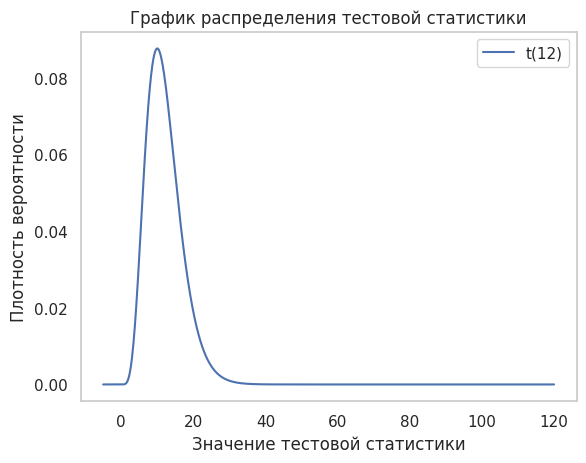

In [216]:
def Xsquare_dist( s ) :


  x = np.linspace(-5, 120, 1000)  # Например, от 0 до 5 с шагом 0.005
  pdf_values = SS.chi2.pdf(x, s)
  plt.plot(x, pdf_values, label=f't({s})')
  plt.xlabel('Значение тестовой статистики')
  plt.ylabel('Плотность вероятности')
  plt.title('График распределения тестовой статистики')
  plt.legend()
  plt.grid()
  plt.show()

Xsquare_dist(12)

ВМНК

In [234]:
weights = np.mean( linear_regression.resid ** 2 ) / linear_regression.resid ** 2
weights

Date
2015-04-01       6.678172
2015-05-01       2.192633
2015-06-01       7.212980
2015-07-01       0.985697
2015-08-01    7002.991416
                 ...     
2023-03-01       1.559140
2023-04-01       1.164494
2023-05-01       0.498736
2023-06-01       0.715755
2023-07-01     938.498658
Length: 100, dtype: float64

In [242]:
y = data['SNP500']
X = data.drop(columns = ['SNP500'] , axis = 1 )

X

,GS1,UNEMPL,CPI,FFER,sq_CPI,sq_FFER,l_GS1,l_UNEMPL,l_CPI,l_FFER,FondMarketIndex,MonetaryFiscalIndex
Date,,,,,,,,,,,,
2015-04-01,0.23,5.4,2.063124,0.124667,4.256479,0.015542,-1.469676,1.686399,0.724221,-2.082112,-4.064639e+08,-2.885503e+08
2015-05-01,0.24,5.6,2.066887,0.123226,4.272021,0.015185,-1.427116,1.722767,0.726044,-2.093737,-4.002298e+08,-2.918708e+08
2015-06-01,0.28,5.3,2.114733,0.129000,4.472094,0.016641,-1.272966,1.667707,0.748928,-2.047943,-4.140686e+08,-2.969159e+08
2015-07-01,0.30,5.2,2.141448,0.130323,4.585798,0.016984,-1.203973,1.648659,0.761482,-2.037743,-4.113562e+08,-2.930590e+08
2015-08-01,0.38,5.1,2.180240,0.138065,4.753446,0.019062,-0.967584,1.629241,0.779435,-1.980034,-4.510412e+08,-2.941665e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,4.68,3.5,6.451708,4.649032,41.624540,21.613501,1.543298,1.252763,1.864345,1.536659,3.917371e+08,3.041741e+08
2023-04-01,4.68,3.4,6.322749,4.830000,39.977151,23.328900,1.543298,1.223775,1.844154,1.574846,4.462422e+08,3.015569e+08
2023-05-01,4.91,3.7,6.000606,5.055806,36.007267,25.561179,1.591274,1.308333,1.791860,1.620537,3.714173e+08,2.857916e+08


In [244]:
import statsmodels.api as sm


wls = sm.WLS(y , sm.add_constant(X), weights= weights ).fit()

print(wls.summary())

                            WLS Regression Results                            
Dep. Variable:                 SNP500   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.365e+05
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          8.31e-191
Time:                        09:52:59   Log-Likelihood:                -448.71
No. Observations:                 100   AIC:                             923.4
Df Residuals:                      87   BIC:                             957.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2608.7086    

тест на нормальность распределения остатков

In [253]:
wls_res = wls.resid
wls_res

0     16.936954
1      9.970877
2     -0.869484
3     13.101638
4     16.704179
        ...    
95   -16.104580
96   -36.643527
97   -34.705385
98    40.346643
99    29.902583
Length: 100, dtype: float64

In [254]:
from scipy import stats
res = stats.normaltest(wls_res)
res.statistic

0.3163007871915836

График распределения тестовой статистики в случае когда верна нулевая гипотеза

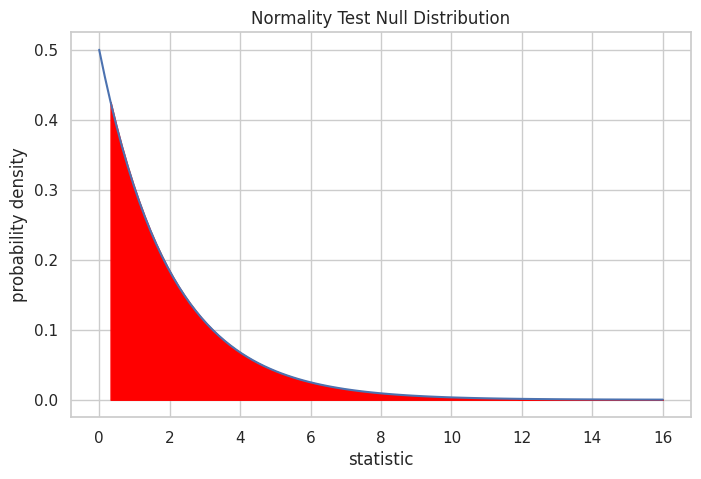

In [263]:
dist = stats.chi2(df=2)
stat_vals = np.linspace(0, 16, 100)
pdf = dist.pdf(stat_vals)
fig, ax = plt.subplots(figsize=(8, 5))
def plot(ax):
    ax.plot(stat_vals, pdf)
    ax.set_title("Normality Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
    i = stat_vals >= res.statistic  # index more extreme statistic values
    ax.fill_between(stat_vals[i], y1=0, y2=pdf[i] , color = 'red')


plot(ax)
plt.show()



Тест Дарбина-Уотсона

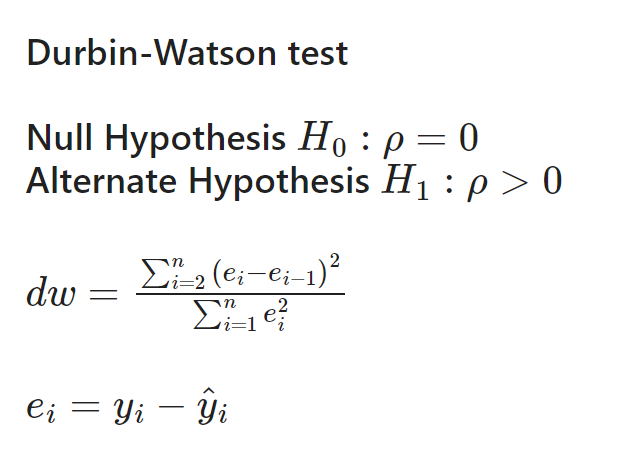

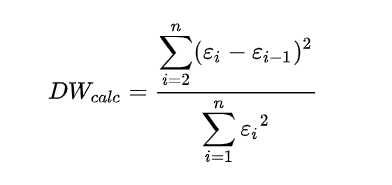

In [264]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(wls.resid)

1.1062571359528348

0     16.936954
1      9.970877
2     -0.869484
3     13.101638
4     16.704179
        ...    
95   -16.104580
96   -36.643527
97   -34.705385
98    40.346643
99    29.902583
Length: 100, dtype: float64

In [268]:
counter = 1
total = []
while counter < 100  :
  total.append( (wls.resid.iloc[counter] - wls.resid.iloc[counter - 1 ] ) ** 2 )
  counter += 1

sum_total = sum(total)
sum_total

54742.667826917765

In [271]:
DW = sum_total / sum(wls.resid ** 2 )

In [272]:
DW

1.1062571359528346

In [279]:
wls.resid

0     16.936954
1      9.970877
2     -0.869484
3     13.101638
4     16.704179
        ...    
95   -16.104580
96   -36.643527
97   -34.705385
98    40.346643
99    29.902583
Length: 100, dtype: float64

<Axes: >

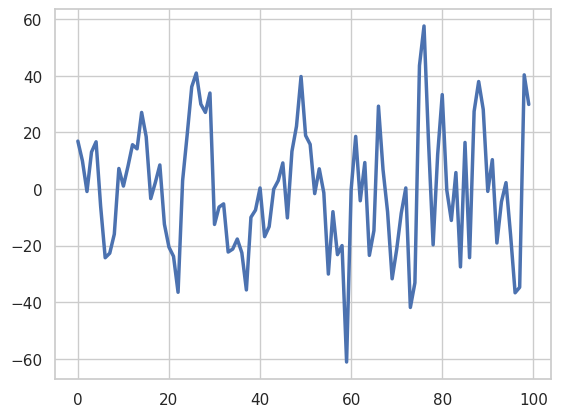

In [283]:

sns.lineplot(wls.resid, palette="tab10", linewidth=2.5)

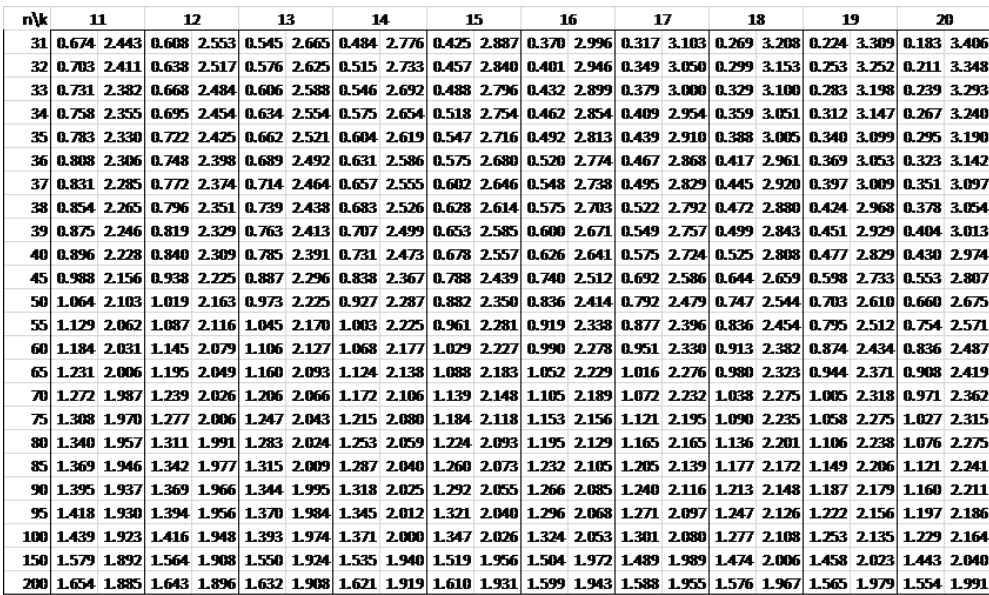

#https://real-statistics.com/statistics-tables/durbin-watson-table/

№10. Метод максимального правдоподобия (ММП); Логит и Пробит модели бинарного выбора

Бинарная переменная SNP500

In [300]:
counter = 1
binary_SNP500 = []
while counter < 100 :
  if (data.SNP500.iloc[counter] - data.SNP500.iloc[counter-1]) > 0 :
    binary_SNP500.append(1)
  else :
    binary_SNP500.append(0)


  counter += 1

len(binary_SNP500)

99

Первые разности

In [304]:
data = pd.read_csv('Econometric/SNP500_data.csv' , sep= ';')

In [307]:
counter = 1
d_NASDAQ = []
while counter < 100 :

  d_NASDAQ.append(data.NASDAQ.iloc[counter] - data.NASDAQ.iloc[counter-1])
  counter += 1






In [308]:
counter = 1
d_DJONES = []
while counter < 100 :

  d_DJONES.append(data.DJONES.iloc[counter] - data.DJONES.iloc[counter-1])
  counter += 1


In [309]:
BinaryModel = pd.DataFrame( {'B_SNP500' : binary_SNP500 , 'd_NASDAQ' : d_NASDAQ , 'd_DJONES' : d_DJONES })
BinaryModel

,B_SNP500,d_NASDAQ,d_DJONES
0,1,128.61,170.16
1,0,-83.16,-391.17
2,1,141.41,70.35
3,0,-351.77,-1161.83
4,0,-156.35,-243.33
...,...,...,...
94,1,766.37,617.45
95,1,4.67,824.01
96,1,708.71,-1189.89
97,1,852.63,1499.33


Logit

In [310]:
y = BinaryModel.B_SNP500
X = BinaryModel[['d_NASDAQ' , 'd_DJONES']]

In [345]:
logit_mod = sm.Logit(y , sm.add_constant(X)).fit()
print(logit_mod.summary())

Optimization terminated successfully.
         Current function value: 0.118066
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               B_SNP500   No. Observations:                   99
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 Dec 2023   Pseudo R-squ.:                  0.8124
Time:                        12:50:18   Log-Likelihood:                -11.689
converged:                       True   LL-Null:                       -62.299
Covariance Type:            nonrobust   LLR p-value:                 1.048e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6577      0.553      1.188      0.235      -0.427       1.742
d_NASDAQ       0.0103      0

In [313]:
probit_mod = sm.Probit(y , sm.add_constant(X)).fit()
print(probit_mod.summary())

Optimization terminated successfully.
         Current function value: 0.115370
         Iterations 10
                          Probit Regression Results                           
Dep. Variable:               B_SNP500   No. Observations:                   99
Model:                         Probit   Df Residuals:                       96
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 Dec 2023   Pseudo R-squ.:                  0.8167
Time:                        11:59:11   Log-Likelihood:                -11.422
converged:                       True   LL-Null:                       -62.299
Covariance Type:            nonrobust   LLR p-value:                 8.022e-23
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4168      0.312      1.336      0.182      -0.195       1.028
d_NASDAQ       0.0059      0

In [325]:
logit_mod.llf


-11.688545084555336

In [327]:
probit_mod.llf

-11.421609497749897

In [347]:
logit_mod.model.predict(logit_mod.params)

array([9.60086940e-01, 4.97974815e-02, 9.31574729e-01, 1.45924706e-05,
       6.50583689e-02, 9.99999634e-01, 8.34869219e-01, 7.87818510e-02,
       3.95386689e-05, 6.06492608e-01, 9.99994365e-01, 5.75635296e-01,
       9.26551880e-01, 6.39593850e-01, 9.99437668e-01, 7.24033601e-01,
       7.36035219e-01, 1.44980936e-01, 9.99868934e-01, 9.96861259e-01,
       9.77274227e-01, 9.99924627e-01, 6.22740306e-01, 9.82153231e-01,
       9.36649848e-01, 9.20848842e-01, 9.98648736e-01, 8.68654245e-01,
       9.89676499e-01, 9.99948759e-01, 9.99787495e-01, 9.83713351e-01,
       9.99999882e-01, 1.76590546e-04, 3.31549579e-04, 7.51890828e-01,
       9.98187658e-01, 5.85782407e-01, 9.99968332e-01, 9.99881001e-01,
       9.69910249e-01, 7.42857674e-08, 9.79803008e-01, 2.65156815e-10,
       9.99999995e-01, 9.99937709e-01, 9.41440762e-01, 9.99888551e-01,
       9.60996608e-09, 9.99999994e-01, 9.86079776e-01, 8.37398978e-03,
       9.90454478e-01, 9.89953066e-01, 9.99990555e-01, 9.99289417e-01,
      

In [348]:
logit_preds = []
for i in logit_mod.model.predict(logit_mod.params):



  if i > 1/2 :
    logit_preds.append(1)
  elif i < 1/2 :
    logit_preds.append(0)



In [349]:
counter = 0

o_as_o = 0
l_as_l = 0
l_as_o = 0
o_as_l = 0


while counter < 99 :
  if BinaryModel.B_SNP500.iloc[counter] == 0 and logit_preds[counter] == 0 :
    o_as_o += 1
  elif BinaryModel.B_SNP500.iloc[counter] == 1 and logit_preds[counter] == 1 :
    l_as_l += 1
  elif BinaryModel.B_SNP500.iloc[counter] == 1 and logit_preds[counter] == 0 :
    l_as_o += 1
  elif BinaryModel.B_SNP500.iloc[counter] == 0 and logit_preds[counter] == 1 :
    o_as_l += 1

  counter += 1

pd.DataFrame({'Pred0' : [o_as_o , l_as_o ] , 'Preds1' : [  o_as_l , l_as_l ] } )

,Pred0,Preds1
0,27,5
1,2,65


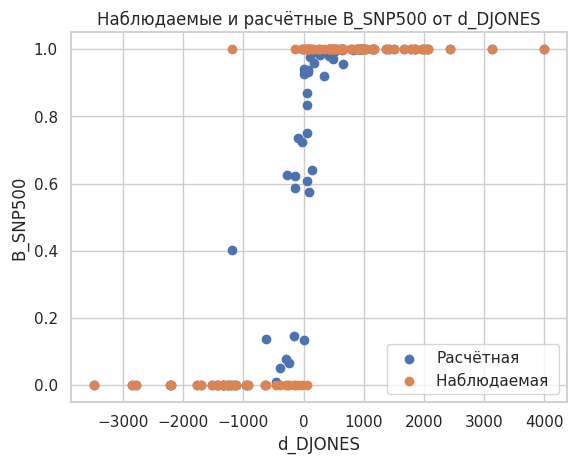

In [357]:
x = BinaryModel.d_DJONES
y1 = logit_mod.model.predict(logit_mod.params)
y2 = y
plt.scatter(x, y1, label='Расчётная')
plt.scatter(x, y2, label='Наблюдаемая ')
plt.title('Наблюдаемые и расчётные B_SNP500 от d_DJONES')
plt.xlabel('d_DJONES')
plt.ylabel('B_SNP500')
plt.legend()
plt.show()

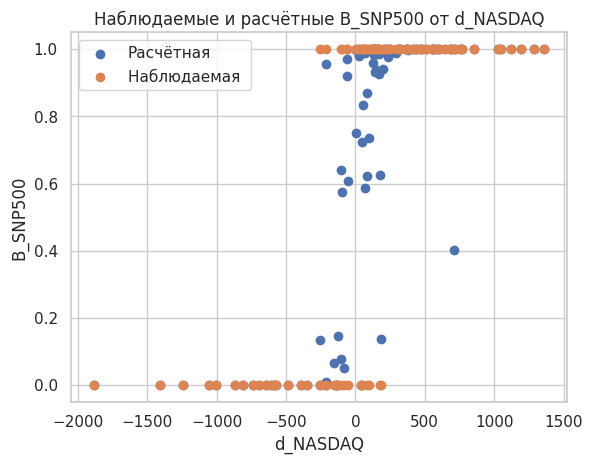

In [358]:
x = BinaryModel.d_NASDAQ
y1 = logit_mod.model.predict(logit_mod.params)
y2 = y
plt.scatter(x, y1, label='Расчётная')
plt.scatter(x, y2, label='Наблюдаемая ')
plt.title('Наблюдаемые и расчётные B_SNP500 от d_NASDAQ')
plt.xlabel('d_NASDAQ')
plt.ylabel('B_SNP500')
plt.legend()
plt.show()

In [350]:
probit_preds = []
for i in probit_mod.model.predict(probit_mod.params):
  if i > 1/2 :
    probit_preds.append(1)
  elif i < 1/2 :
    probit_preds.append(0)

counter = 0

o_as_o = 0
l_as_l = 0
l_as_o = 0
o_as_l = 0


while counter < 99 :
  if BinaryModel.B_SNP500.iloc[counter] == 0 and probit_preds[counter] == 0 :
    o_as_o += 1
  elif BinaryModel.B_SNP500.iloc[counter] == 1 and probit_preds[counter] == 1 :
    l_as_l += 1
  elif BinaryModel.B_SNP500.iloc[counter] == 1 and probit_preds[counter] == 0 :
    l_as_o += 1
  elif BinaryModel.B_SNP500.iloc[counter] == 0 and probit_preds[counter] == 1 :
    o_as_l += 1

  counter += 1

pd.DataFrame({'Pred0' : [o_as_o , l_as_o ] , 'Preds1' : [  o_as_l , l_as_l ] } )

,Pred0,Preds1
0,27,5
1,2,65


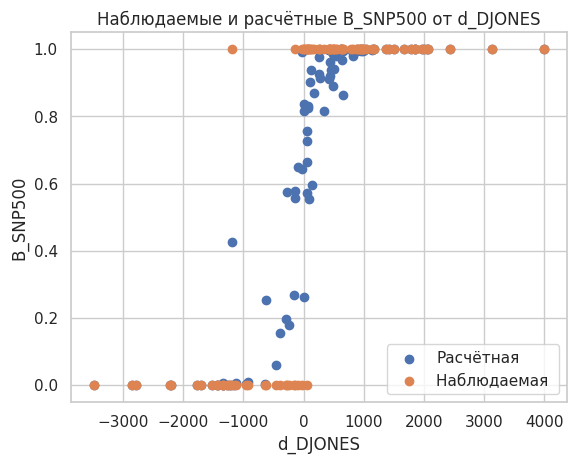

In [359]:
x = BinaryModel.d_DJONES
y1 = logit_mod.model.predict(probit_mod.params)
y2 = y
plt.scatter(x, y1, label='Расчётная')
plt.scatter(x, y2, label='Наблюдаемая ')
plt.title('Наблюдаемые и расчётные B_SNP500 от d_DJONES')
plt.xlabel('d_DJONES')
plt.ylabel('B_SNP500')
plt.legend()
plt.show()

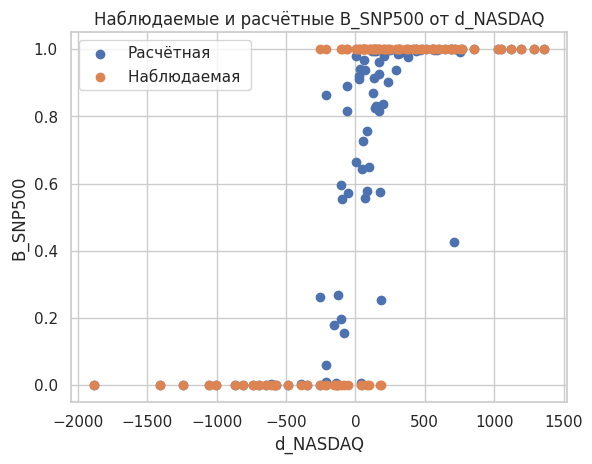

In [360]:
x = BinaryModel.d_NASDAQ
y1 = logit_mod.model.predict(probit_mod.params)
y2 = y
plt.scatter(x, y1, label='Расчётная')
plt.scatter(x, y2, label='Наблюдаемая ')
plt.title('Наблюдаемые и расчётные B_SNP500 от d_NASDAQ')
plt.xlabel('d_NASDAQ')
plt.ylabel('B_SNP500')
plt.legend()
plt.show()